# Visualizing Supervised Machine Learning

Credit
* Inspirations by Leonard Thiele,  Antonio Sánchez Friedeberg, and Sean Pedersen
* Parts of the code based on material from scikit learn documentation

_Please send questions and feedback to oliver.zeigermann@gmail.com or @DJCordhose on Twitter, I will be happy to explain or add to this notebook_

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pyplot as plt
plt.xkcd()

In [4]:
# if this is true, all images are saved to disk
global_print_flag = True

In [5]:
!mkdir tmp_figures

A subdirectory or file tmp_figures already exists.


# Loading and exploring our data set

This is a database of customers of an insurance company. Each data point is one customer. The group represents the number of accidents the customer has been involved with in the past

* 0 - red: many accidents
* 1 - green: few or no accidents
* 2 - yellow: in the middle        

In [6]:
# Choose one of the two following data sets, the larger one gives better results, but might clutter the visualization depending on resolution

# !curl -O https://raw.githubusercontent.com/DJCordhose/ai/master/notebooks/scipy/data/insurance-customers-1500.csv
# !curl -O https://raw.githubusercontent.com/DJCordhose/ai/master/notebooks/scipy/data/insurance-customers-300.csv

In [7]:
import pandas as pd
# df = pd.read_csv('./insurance-customers-300.csv', sep=';')
df = pd.read_csv('./insurance-customers-1500.csv', sep=';')

In [8]:
df.head()

max speed   age  thousand km per year  group
0      148.0  44.0                  25.0      1
1      168.0  54.0                  24.0      1
2      161.0  26.0                  34.0      0
3      137.0  25.0                  10.0      2
4      164.0  38.0                  22.0      1

In [9]:
df.describe()

max speed          age  thousand km per year        group
count  1500.000000  1500.000000           1500.000000  1500.000000
mean    171.386000    44.969333             30.511333     0.998667
std      19.269126    16.935040             15.112317     0.816768
min     118.000000    18.000000              5.000000     0.000000
25%     158.000000    32.000000             18.000000     0.000000
50%     170.000000    42.000000             29.000000     1.000000
75%     187.000000    55.000000             42.000000     2.000000
max     216.000000    90.000000             84.000000     2.000000

## A pairplot gives you a nice overview of your data with just a few lines of code

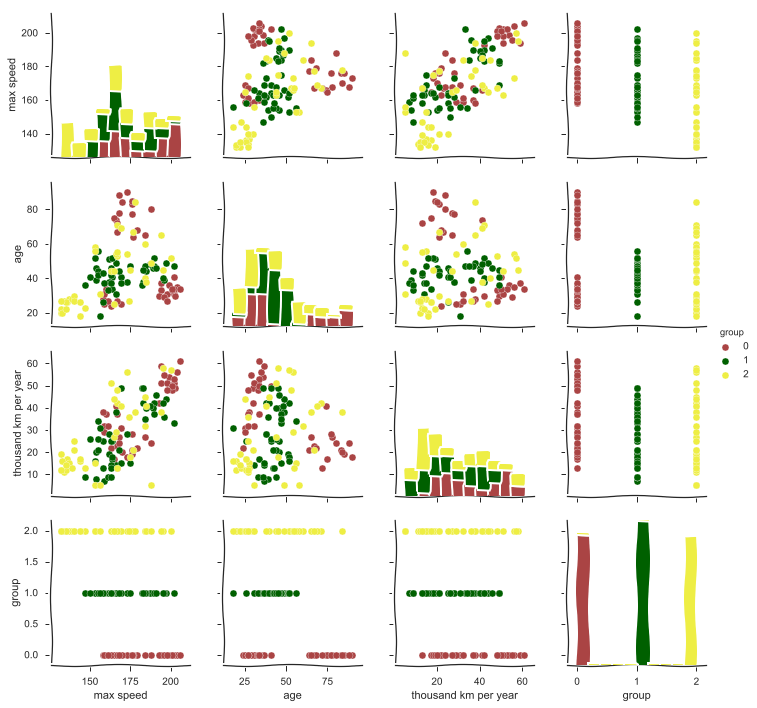

In [10]:
import seaborn as sns
sns.set(style="ticks")

sample_df = df.sample(n=120, random_state=42)

colors_light = {0: '#FFAAAA', 1: '#AAFFAA', 2: '#FFFFDD'}
colors_bold = {0: '#AA4444', 1: '#006000', 2: '#EEEE44'}

sns.pairplot(sample_df, hue="group", palette=colors_bold)

# Concepts

## First important concept: You train a machine with your data to make it learn the relationship between some input data and a certain label - this is called supervised learning

In [11]:
# we deliberately decide this is going to be our label, it is often called lower case y
y=df['group']

In [12]:
# since 'group' is now the label we want to predict, we need to remove it from the training data 
df.drop('group', axis='columns', inplace=True)

In [13]:
# input data often is named upper case X, the upper case indicates, that each row is a vector
X = df.as_matrix()

### We restrict ourselves to two dimensions for now

Because this is all we really can visualize in 2d

In [14]:
# ignore this, it is just technical code to plot decision boundaries
# Adapted from:
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# http://jponttuset.cat/xkcd-deep-learning/

from matplotlib.colors import ListedColormap

cmap_print = ListedColormap(['#AA8888', '#004000', '#FFFFDD'])
cmap_bold = ListedColormap(['#AA4444', '#006000', '#EEEE44'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFDD'])
font_size=25
title_font_size=40

def meshGrid(x_data, y_data):
    h = 1  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, ground_truth, title="", 
                   mesh=True, fname=None, print=False):
    xx,yy = meshGrid(x_data, y_data)
    plt.figure(figsize=(20,10))

    if clf and mesh:
        Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    if print:
        plt.scatter(x_data, y_data, c=ground_truth, cmap=cmap_print, s=200, marker='o', edgecolors='k')
    else:
        plt.scatter(x_data, y_data, c=ground_truth, cmap=cmap_bold, s=100, marker='o', edgecolors='k')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=title_font_size)
    if fname and global_print_flag:
        plt.savefig('tmp_figures/'+fname)
        
def plot_keras_prediction(clf, x_data, y_data, x_label, y_label, ground_truth, title="", 
                          mesh=True, fixed=None, fname=None, print=False):
    xx,yy = meshGrid(x_data, y_data)
    plt.figure(figsize=(20,10))

    if clf and mesh:
        grid_X = np.array(np.c_[yy.ravel(), xx.ravel()])
        if fixed:
            fill_values = np.full((len(grid_X), 1), fixed)
            grid_X = np.append(grid_X, fill_values, axis=1)
        Z = clf.predict(grid_X)
        Z = np.argmax(Z, axis=1)
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    if print:
        plt.scatter(x_data, y_data, c=ground_truth, cmap=cmap_print, s=200, marker='o', edgecolors='k')
    else:
        plt.scatter(x_data, y_data, c=ground_truth, cmap=cmap_bold, s=100, marker='o', edgecolors='k')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=title_font_size)
    if fname and global_print_flag:
        plt.savefig('tmp_figures/'+fname)

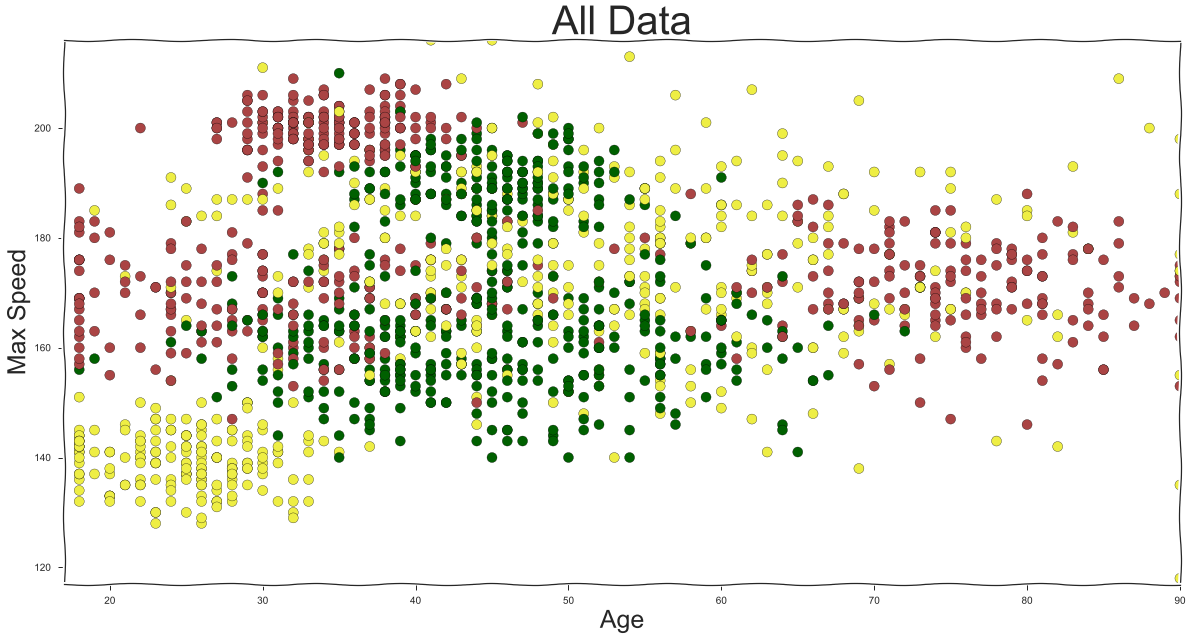

In [15]:
X_kmh_age = X[:, :2] 
plotPrediction(None, X_kmh_age[:, 1], X_kmh_age[:, 0], 
               'Age', 'Max Speed', y, mesh=False,
                title="All Data",
                fname='all.png')

## We provide a few hand built classifiers as base lines

* a base line can be a very simple classifier that shows what is doable with limited effort
* a more sophisticated approach needs to do better than a base line, otherwise it has no point
* how well a classifier does is described as a score for accuracy

In [16]:
# 0: red
# 1: green
# 2: yellow

class ClassifierBase:
    def predict(self, X):
        return np.array([ self.predict_single(x) for x in X])
    def score(self, X, y):
        n = len(y)
        correct = 0
        predictions = self.predict(X)
        for prediction, ground_truth in zip(predictions, y):
            if prediction == ground_truth:
                correct = correct + 1
        return correct / n

from random import randrange

class RandomClassifier(ClassifierBase):
    def predict_single(self, x):
        return randrange(3)

In [17]:
random_clf = RandomClassifier()

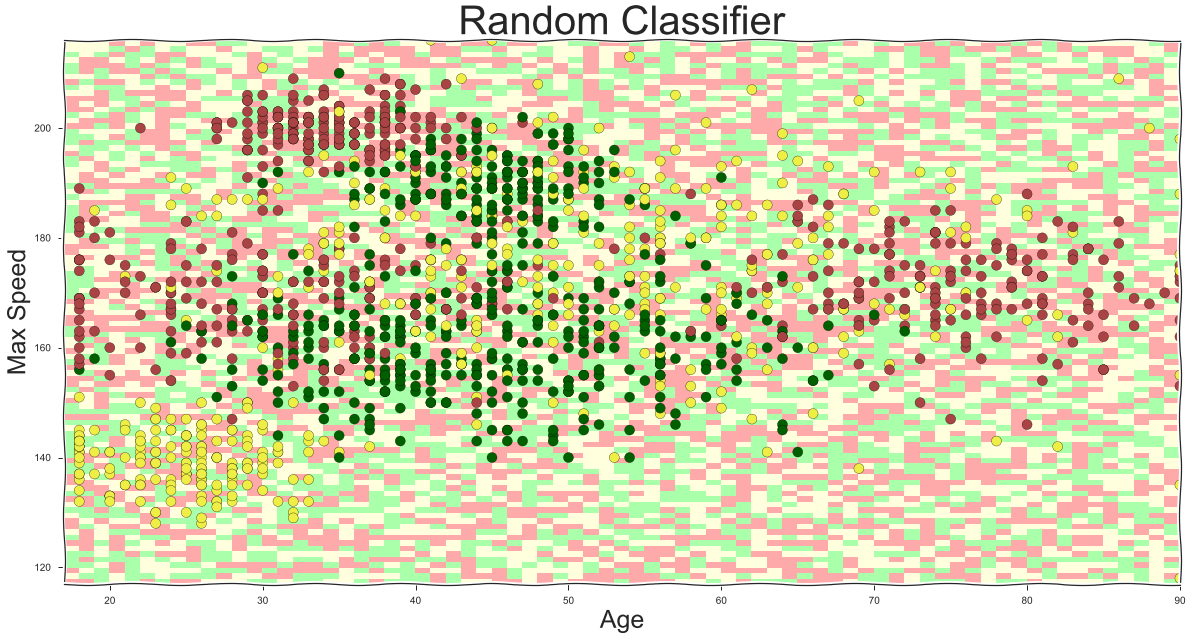

In [18]:
plotPrediction(random_clf, X[:, 1], X[:, 0], 
               'Age', 'Max Speed', y,
                title="Random Classifier",
                fname='random.png')

In [19]:
# this computes how many values are predicted correctly, this should be 0.33 (33%) on average, but will differ with each run

random_clf.score(X, y)

0.3446666666666667

In [20]:
# just a few rules created by hand

class BaseLineClassifier(ClassifierBase):
    def predict_single(self, x):
        try:
            speed, age, km_per_year = x
        except:
            speed, age = x
            km_per_year = 0
        if age < 25:
            if speed > 180:
                return 0
            else:
                return 2
        if age > 75:
            return 0
        if km_per_year > 50:
            return 0
        if km_per_year > 35:
            return 2
        return 1

In [21]:
base_clf = BaseLineClassifier()

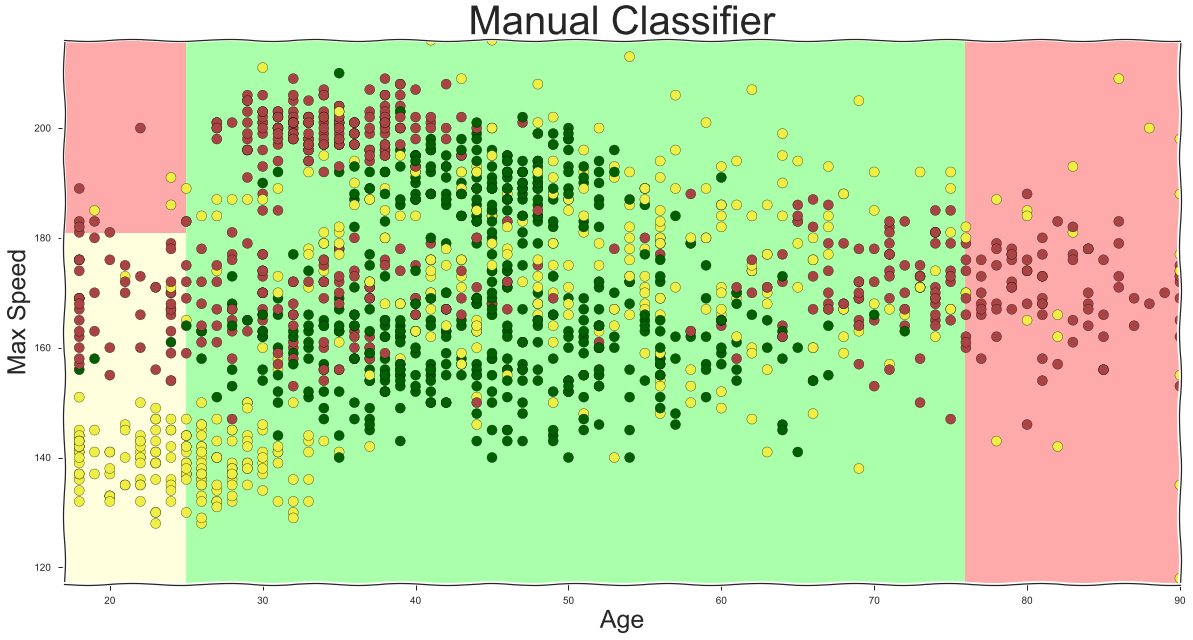

In [22]:
plotPrediction(base_clf, X[:, 1], X[:, 0], 
               'Age', 'Max Speed', y,
                title="Manual Classifier",
                fname='prog.png')

## The lines between the areas of prection are called _decision boundaries_

In [23]:
base_clf.score(X, y)

0.454

## Second important concept: To have an idea how well the training worked, we save same data to test our model on previously unseen data. 

* The real objective is to have a generalized model that works well on the test data.
* How well it performs on this test data as opposed to the training data tells us quite a bit as well.
* Typical splits are 60% for training and 40% for testing or 80/20
* It is important that we do not use the test data to tweak the hyper parameters of our learning strategy - in this case the test data would (indirectly) influence the training and can no longer tell how well we did
* evaluate the test date set only once at the end of your experiment

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# using stratefy we get a balanced number of samples per category (important!)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [26]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((900, 3), (900,), (600, 3), (600,))

In [27]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2], dtype=int64), array([301, 300, 299], dtype=int64))

In [28]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2], dtype=int64), array([200, 200, 200], dtype=int64))

In [29]:
X_train_2_dim = X_train[:, :2]
X_test_2_dim = X_test[:, :2]

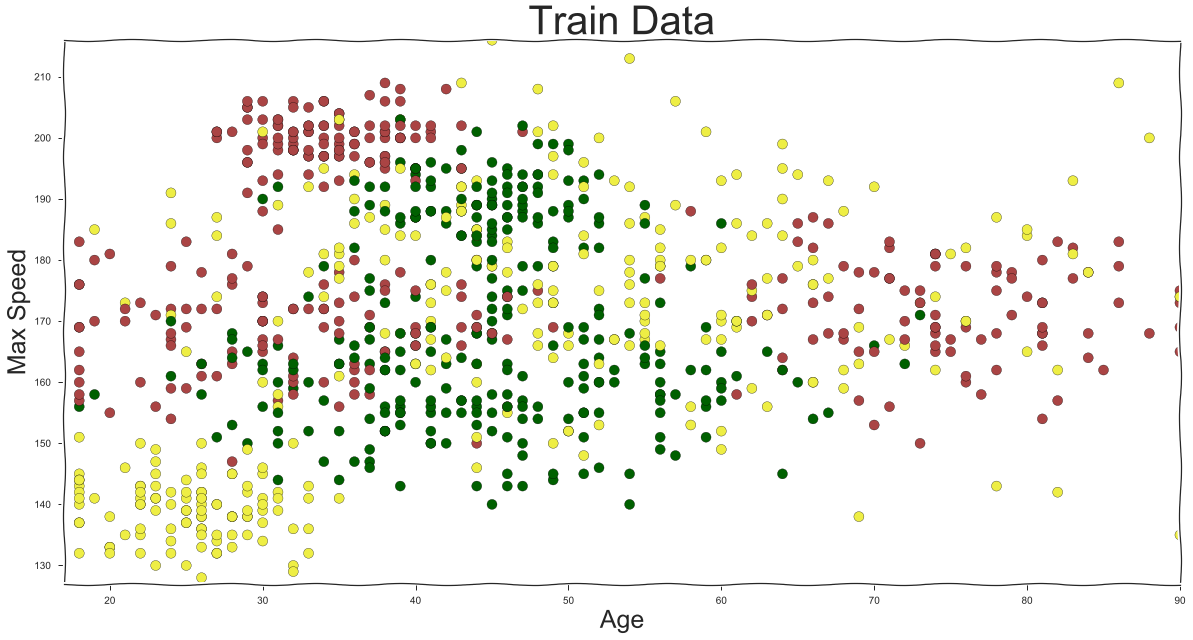

In [30]:
plotPrediction(None, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train, mesh=False,
                title="Train Data",
                fname='train.png')

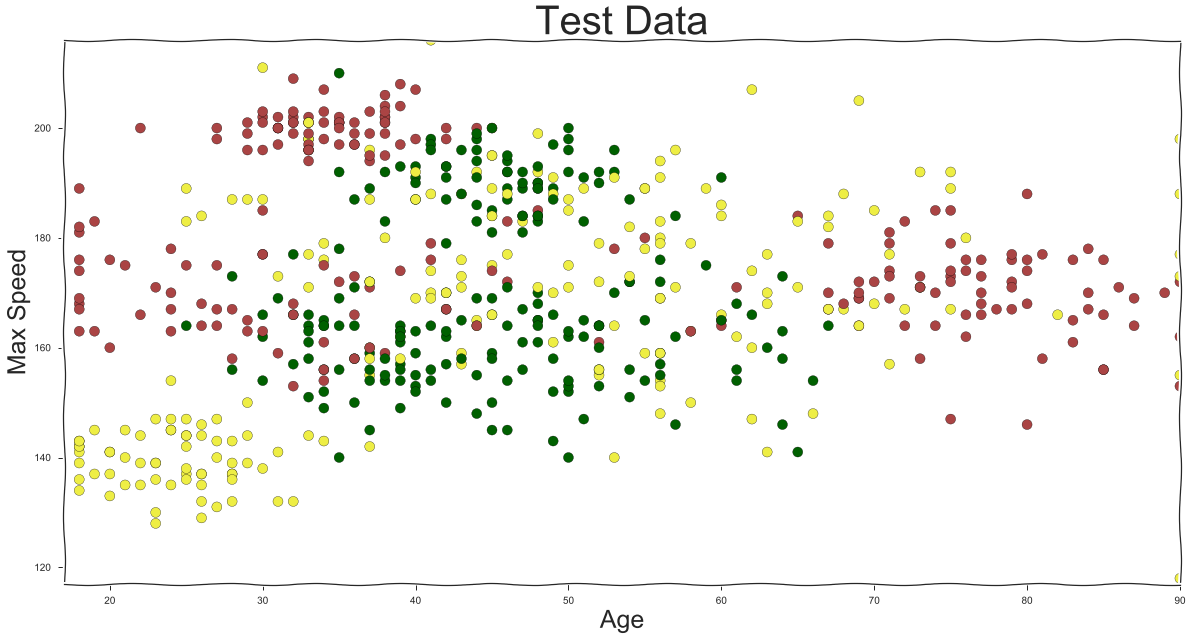

In [31]:
plotPrediction(None, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test, mesh=False,
                title="Test Data",
                fname='test.png')

## KNN - Most basic learning strategy: Look at the neighbors to make a prediction for a sample yet unknown

In [32]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(1)

In [33]:
%time clf.fit(X_train_2_dim, y_train)

Wall time: 995 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

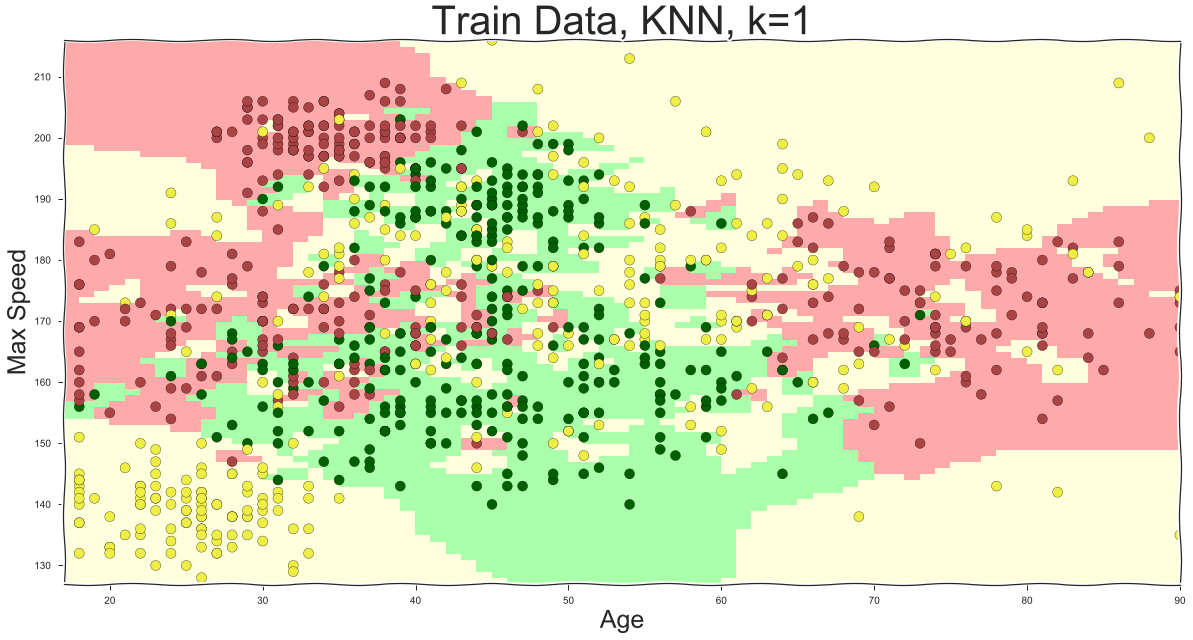

In [34]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, KNN, k=1",
                fname='knn1-train.png')

In [35]:
clf.score(X_train_2_dim, y_train)

0.9633333333333334

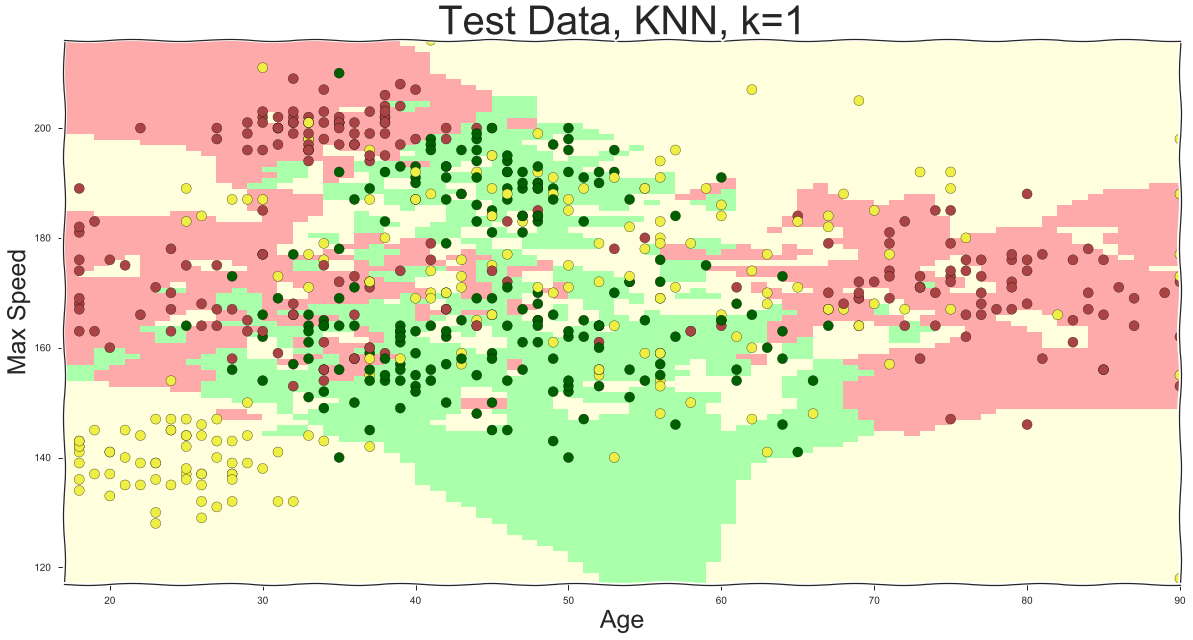

In [36]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, KNN, k=1",
                fname='knn1-test.png')

In [37]:
clf.score(X_test_2_dim, y_test)

0.6366666666666667

In [38]:
# http://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_val_score

In [39]:
# cross_val_score?

Cross Validation splits the train data in different ways and performs a number of training runs (3 in this case) 

In [40]:
scores = cross_val_score(clf, X_train_2_dim, y_train, n_jobs=-1)
scores

array([0.61129568, 0.66666667, 0.65217391])

In [41]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.64 (+/- 0.05)


## Third important concept: Our objective is to make the best prediction for unknown samples. This is called generalization. If we perform well on knwon data, but less good on unknown data this is called overfitting. This is to be avoided. Measures taken to avoid overfitting are also known as _regularization_.

### In KNN we reduce overfitting by taking more neighbors into account

We can try what is the best number of numbers manually, but grid search does the same thing, only with less manual effort. This one tries the number of neighbors between 1 and 50

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 50)),
    'weights': ['uniform', 'distance']
    }
clf = GridSearchCV(KNeighborsClassifier(), param_grid, n_jobs=-1)
%time clf.fit(X_train_2_dim, y_train)
clf.best_params_

Wall time: 6.97 s


{'n_neighbors': 23, 'weights': 'uniform'}

In [43]:
clf = KNeighborsClassifier(n_neighbors=23, weights='uniform')
%time clf.fit(X_train_2_dim, y_train)

Wall time: 2 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')

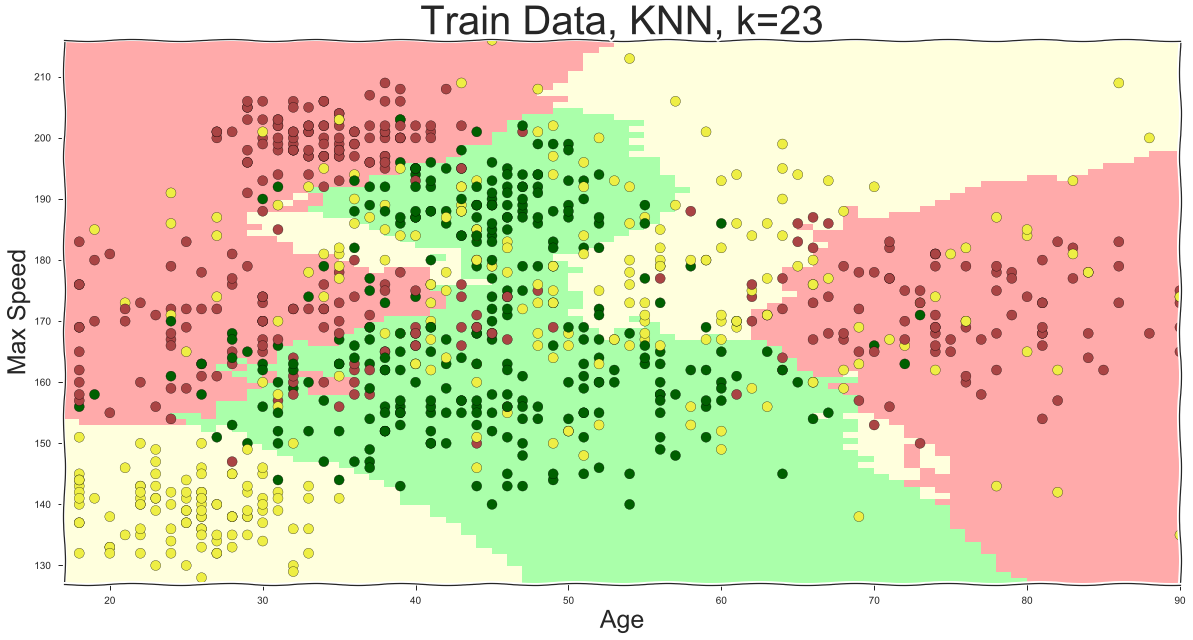

In [44]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, KNN, k=23",
                fname='knn23-train.png')

### A rule of thumb: Smoother decision boundaries imply less overfitting

In [45]:
clf.score(X_train_2_dim, y_train)

0.7322222222222222

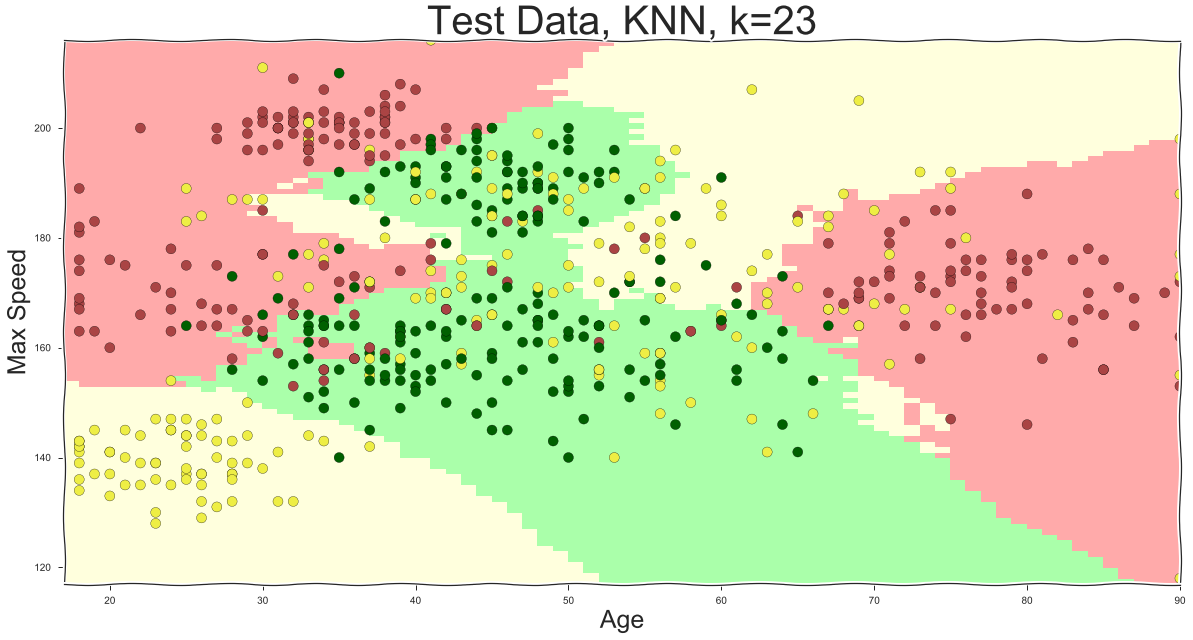

In [46]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, KNN, k=23",
                fname='knn23-test.png')

In [47]:
clf.score(X_test_2_dim, y_test)

0.7216666666666667

In [48]:
scores = cross_val_score(clf, X_train_2_dim, y_train, n_jobs=-1)
scores

array([0.68106312, 0.74666667, 0.69565217])

In [49]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.71 (+/- 0.06)


## Descision Trees

* Another learning strategy, just like KNN is one
* Splits our data set on a certain variable
* Similar to what we have done in the manual classifier, but here the rules are actually learned

In [50]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
%time clf.fit(X_train_2_dim, y_train)

Wall time: 1e+03 µs


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
# we perform at most 20 splits of our data until we make a decision where the data point belongs

clf.tree_.max_depth

21

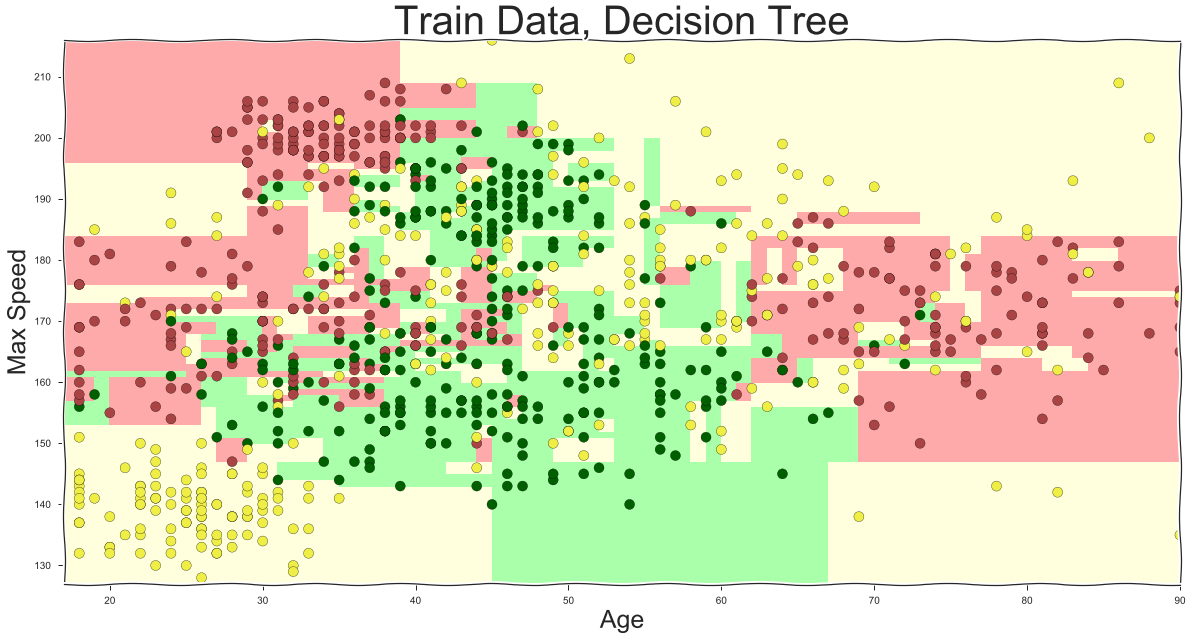

In [52]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, Decision Tree",
                fname='dt-overfit-train.png')

In [53]:
clf.score(X_train_2_dim, y_train)

0.9633333333333334

In [54]:
scores = cross_val_score(clf, X_train_2_dim, y_train, n_jobs=-1)
scores

array([0.58139535, 0.60333333, 0.63545151])

In [55]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.61 (+/- 0.04)


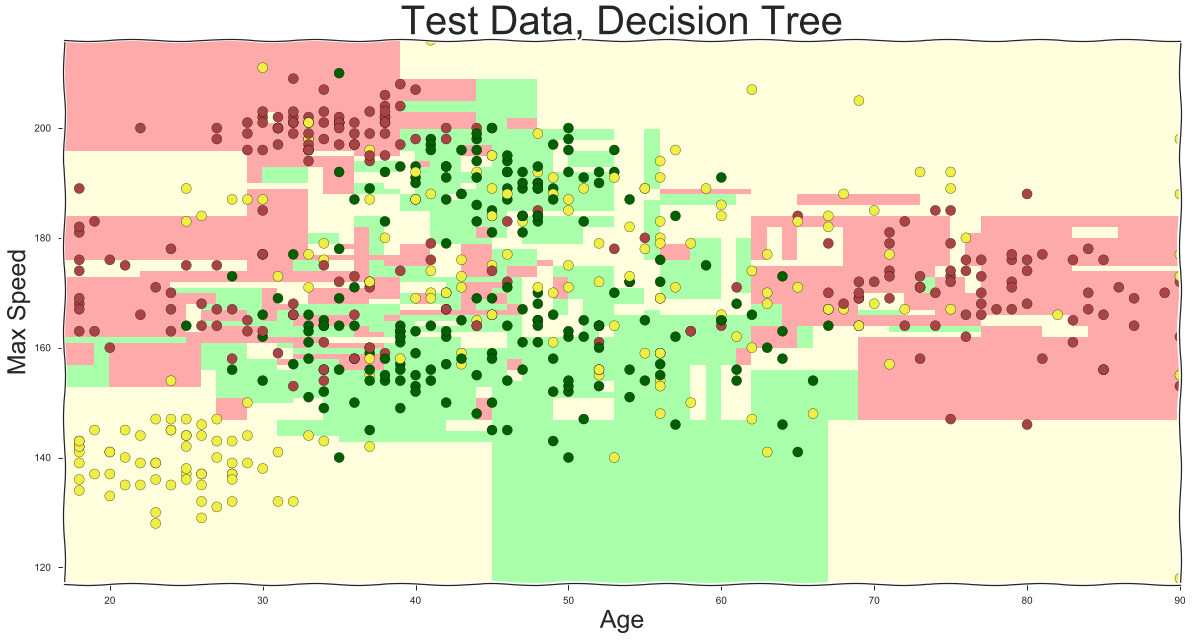

In [56]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Decision Tree",
                fname='dt-overfit-test.png')

In [57]:
clf.score(X_test_2_dim, y_test)

0.6083333333333333

We overfit heavily and need to change the relevant parameters of our tree
* its maximum number of spits (depth) - if there is no limit, we can make as many splits as it takes to perfectly match all train data (overfitting)
* how many samples we need at least for a leaf - if it is just one, we could perfectly fit all training data (overfitting)
* how many samples do we need to make another split - not as crucial as the other two, but can still limit overfitting

In [58]:
param_grid = {
    'max_depth': list(range(2, 25)),
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11))
}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=-1)
%time clf.fit(X_train_2_dim, y_train)
clf.best_params_

Wall time: 9.87 s


{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 3}

In [59]:
clf = DecisionTreeClassifier(max_depth=7,
                              min_samples_leaf=4,
                              min_samples_split=19)
%time clf.fit(X_train_2_dim, y_train)

Wall time: 2.01 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=19,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
clf.tree_.max_depth

7

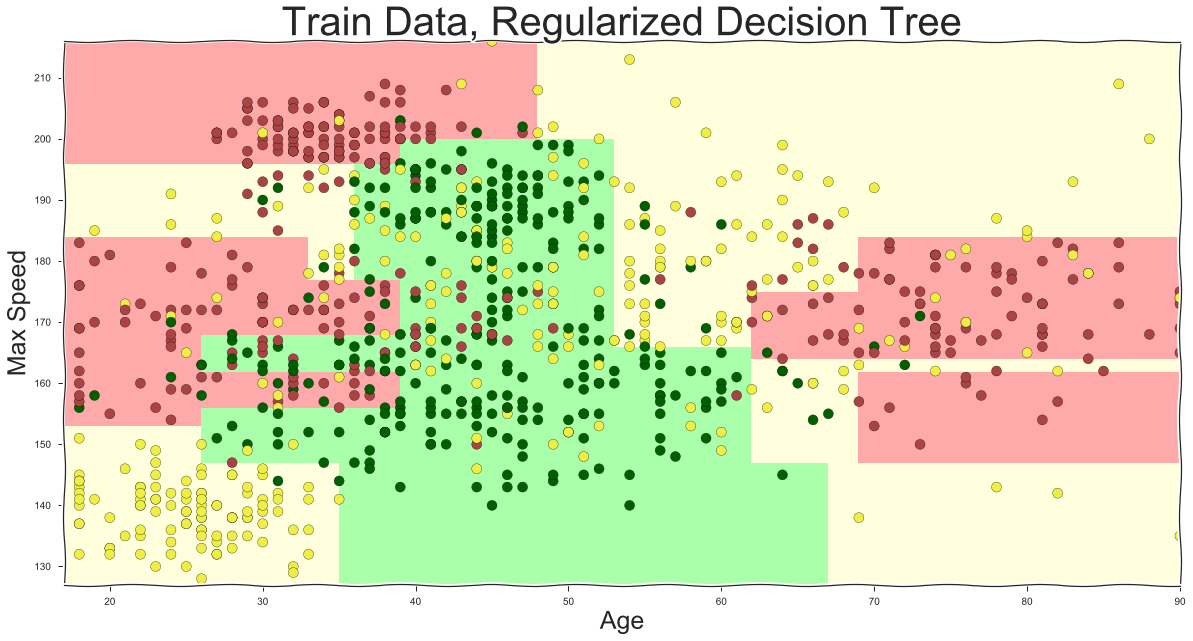

In [61]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, Regularized Decision Tree",
                fname='dt-sweet-train.png')

In [62]:
clf.score(X_train_2_dim, y_train)

0.7677777777777778

In [63]:
scores = cross_val_score(clf, X_train_2_dim, y_train, n_jobs=-1)
scores

array([0.69435216, 0.73333333, 0.68227425])

In [64]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.70 (+/- 0.04)


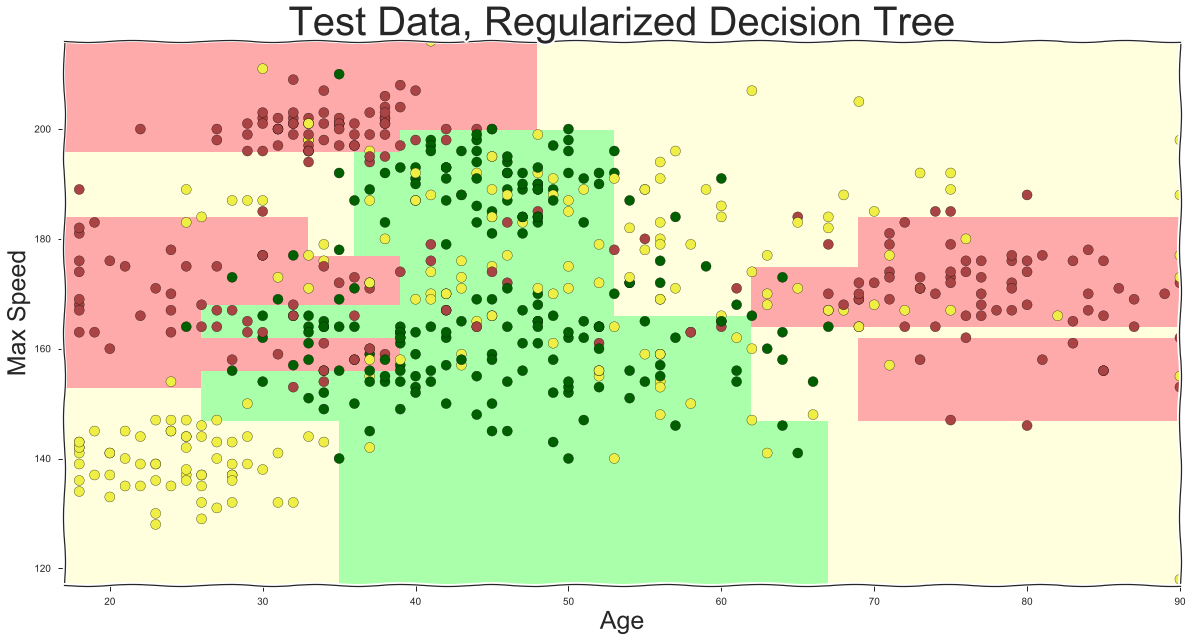

In [65]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Regularized Decision Tree",
                fname='dt-sweet-test.png')

In [66]:
clf.score(X_test_2_dim, y_test)

0.7

## Random Forest
* We fight overfitting in decision trees with some success
* However, inherent to their nature, decision trees tend to overfit
* Random Forest is an ensemble technique that trains a number of simple decision trees and uses a majority vote over all of them for prediction
* While each decision tree still overfits using many of them softens this problems
* You still need to regularize the underlying decision trees
* sklearn has a default of 10 decision trees for random forest
* Random Forest is the swiss army knife of machine learning

In [67]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1)
%time clf.fit(X_train_2_dim, y_train)

Wall time: 118 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
clf.score(X_train_2_dim, y_train)

0.9344444444444444

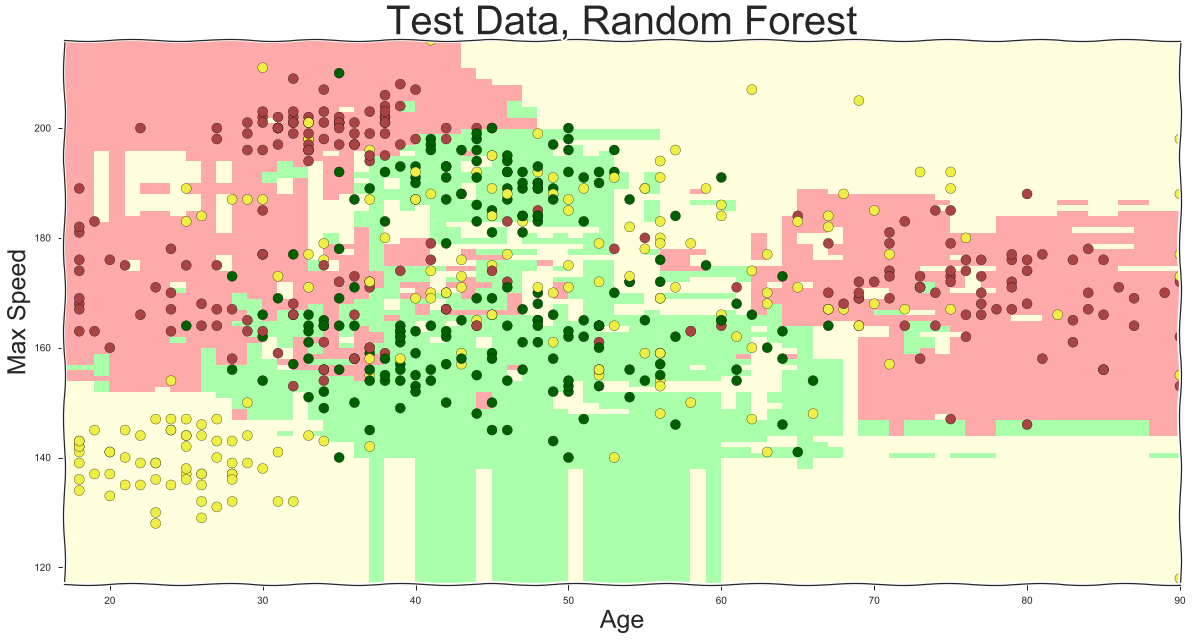

In [69]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Random Forest",
                fname='rf-overfit-train.png')

In [70]:
clf.score(X_test_2_dim, y_test)

0.6383333333333333

In [71]:
# brute force grid search is far too expensive

param_grid = {
    'n_estimators': list(range(3,20)),
    'max_depth': list(range(2, 25)),
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11))
}
clf = GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=-1)
# %time clf.fit(X_train_2_dim, y_train)
# clf.best_params_

Unfortunately, training random forest classifiers is more expensive than decision trees by the number of estimators it uses (10 in our case). This makes using a deterministic grid search over all parameters prohibitively expensive. We instead use a randomized search, that tries 100 different values and we hope to find the best here.

In [72]:
# http://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(3,20),
    "max_depth": randint(2, 25),
    "min_samples_split": randint(2, 11),
    "min_samples_leaf": randint(1, 11)
}

clf = RandomizedSearchCV(RandomForestClassifier(), param_dist, n_iter=1000, n_jobs=-1)
%time clf.fit(X_train_2_dim, y_train)
clf.best_params_

Wall time: 20.5 s


{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 10}

In [73]:
# parameters might vary a bit with each run, because it is a random search
clf = RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=17, n_jobs=-1)
%time clf.fit(X_train_2_dim, y_train)

Wall time: 115 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=17, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [74]:
clf.score(X_train_2_dim, y_train)

0.7477777777777778

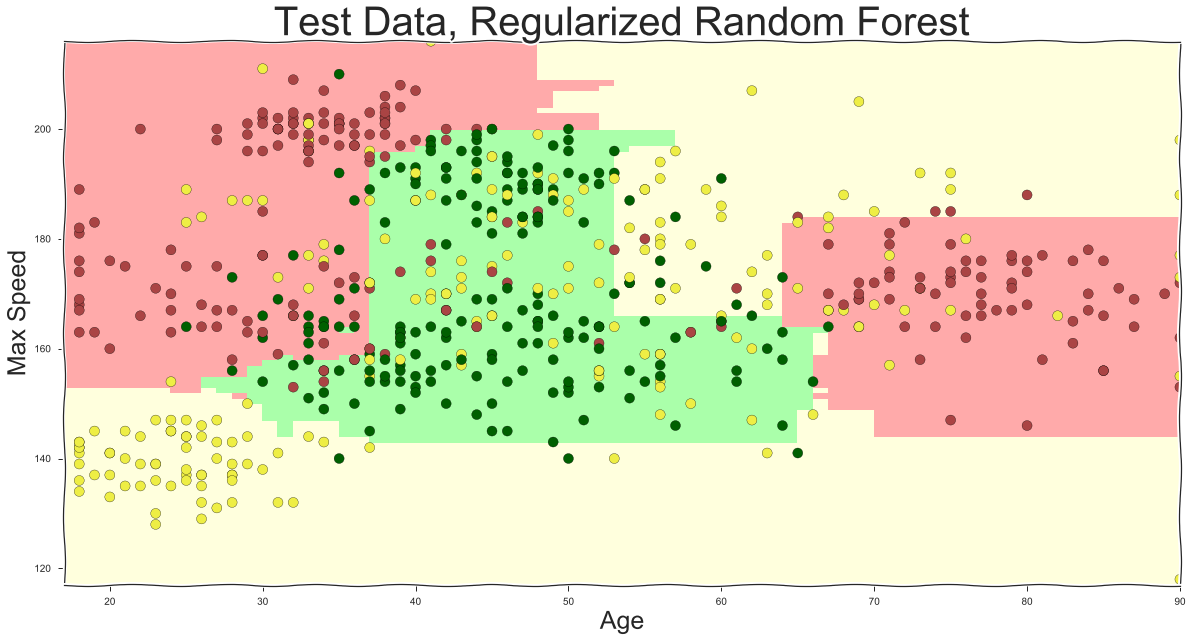

In [75]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Regularized Random Forest",
                fname='rf-sweet-test.png')

In [76]:
clf.score(X_test_2_dim, y_test)

0.71

## Support Vector Machines (SVM)
* SVMs used to be the hot stuff before neural networks stole the show
* SVMs choose a small number of data points to decide where to draw the decision boundary, they are called the *support vectors*

In its base version SVMs can only use lines as decision boundaries. Let's see how well this works.

In [77]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
%time clf.fit(X_train_2_dim, y_train)

Wall time: 281 ms


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [78]:
clf.score(X_train_2_dim, y_train)

0.4166666666666667

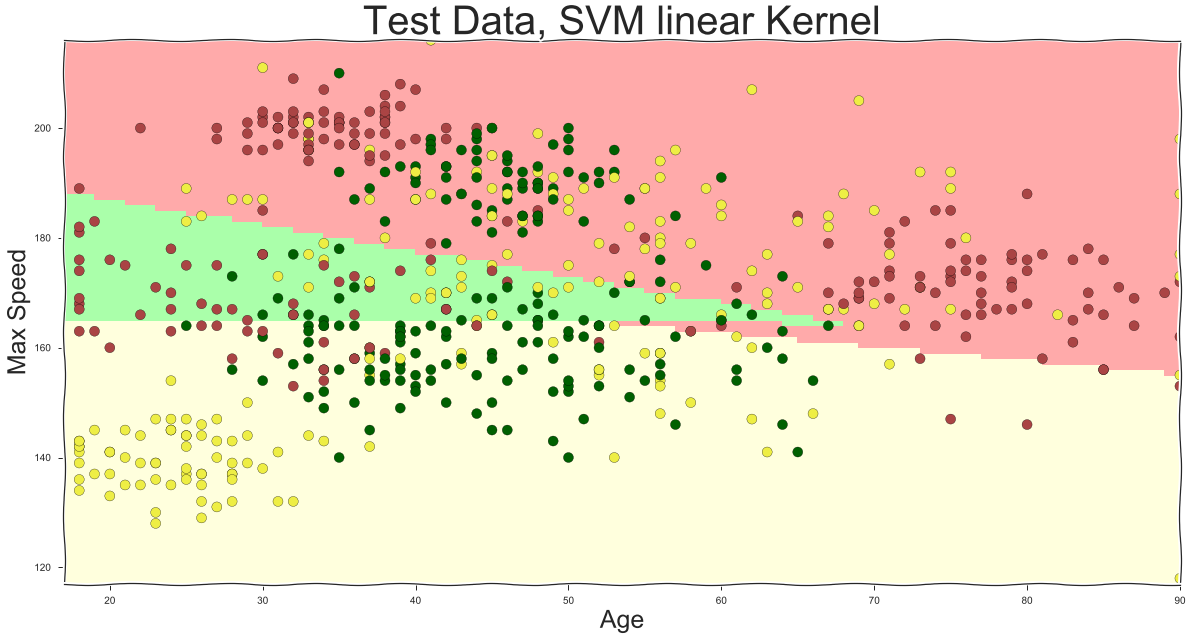

In [79]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, SVM linear Kernel",
                fname='svm-underfit-linear-train.png')

#### SVM Kernels

* As we can see using lines only, we can not even fit the training data, this is called *underfitting*.
* For most realisitic examples we need something better called the 'kernel trick'
* We transform the original problem space into another that is separable by lines only
* Radial Base Functions 'rbf' can approximate any function and are trained to perform this transformation

In [80]:
from sklearn.svm import SVC
clf = SVC()
%time clf.fit(X_train_2_dim, y_train)

Wall time: 51.1 ms


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [81]:
clf.score(X_train_2_dim, y_train)

0.9166666666666666

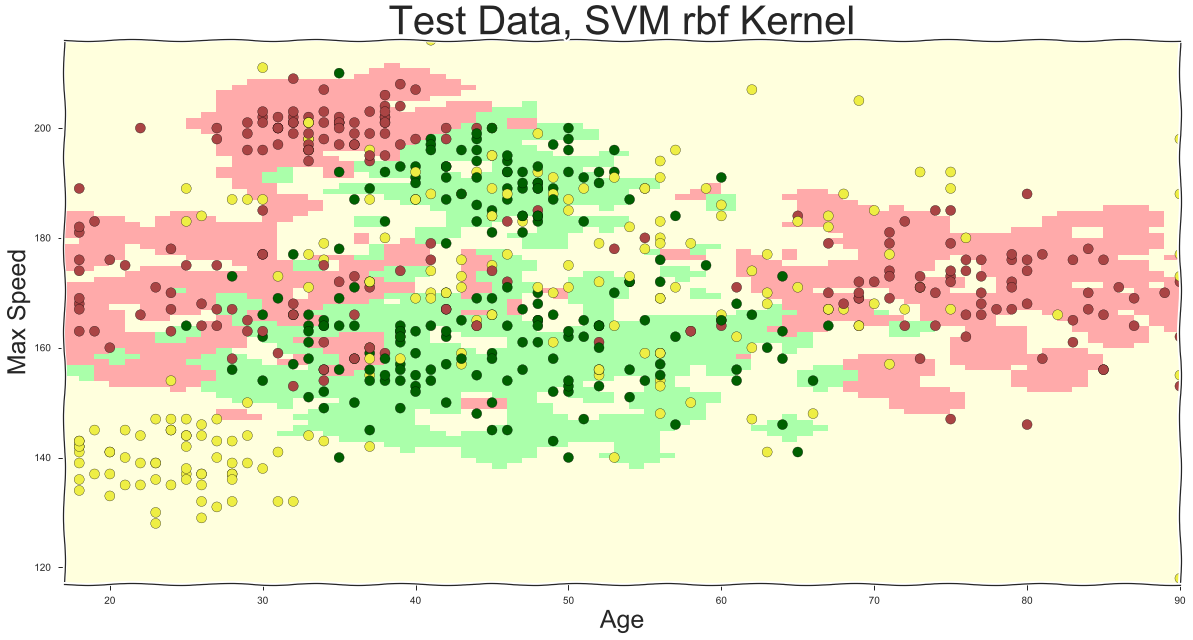

In [82]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, SVM rbf Kernel",
                fname='svm-overfit-test.png')

In [83]:
clf.score(X_test_2_dim, y_test)

0.6533333333333333

In [84]:
# SVC?

Again we strongly overfit and need to regularize our model. The two important parameters are
* C: decides how expensive it is to misclassify one of our support vectors, the smaller the more tolerant
* gamma: the higher the more points remote from the support vectors influence where the decision boundaries go

In [85]:
param_grid = {
    'C': list(np.append(np.arange(0.1, 1.0, 0.1), np.arange(2, 10, 1))),
    'gamma': list(np.append(np.arange(0.001, 0.1, 0.0005), np.arange(.02, 1.0, 0.1))),
}
clf = GridSearchCV(SVC(), param_grid, n_jobs=-1)
%time clf.fit(X_train_2_dim, y_train)
clf.best_params_

Wall time: 56.4 s


{'C': 8.0, 'gamma': 0.001}

In [86]:
clf = SVC(C=8, gamma=0.001)
%time clf.fit(X_train_2_dim, y_train)

Wall time: 15 ms


SVC(C=8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [87]:
clf.score(X_train_2_dim, y_train)

0.7333333333333333

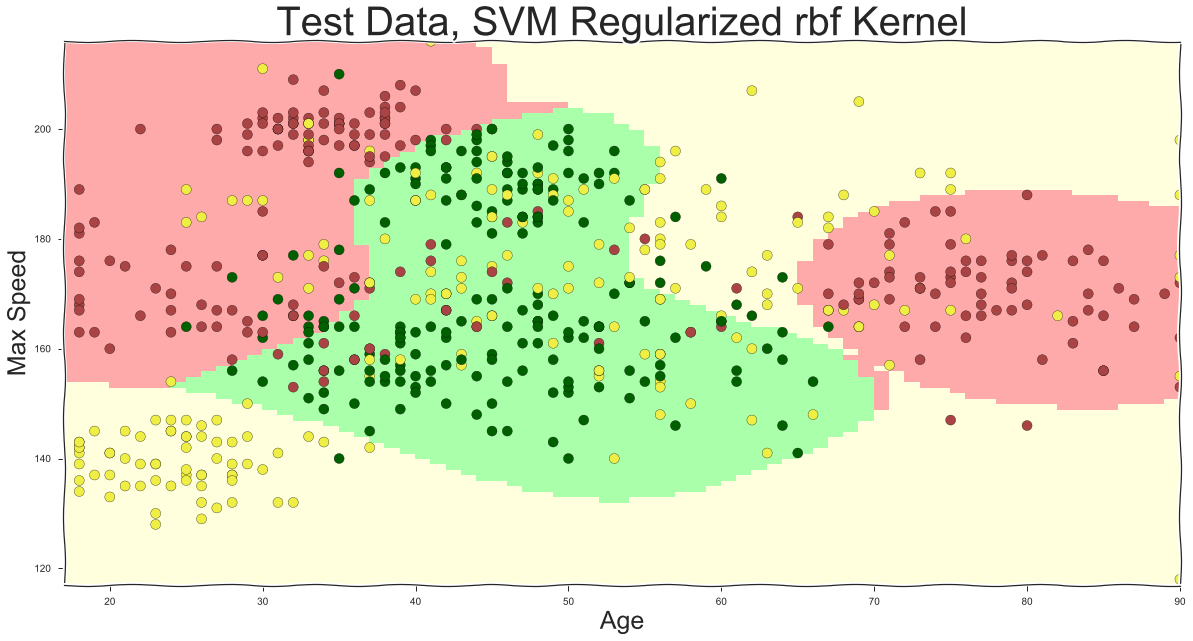

In [88]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, SVM Regularized rbf Kernel",
                fname='svm-reg-test.png')

In [89]:
clf.score(X_test_2_dim, y_test)

0.73

## _Important_ if you let this run on Colab switch on the GPU option, because otherwise this part will take quite some time

## Neural Networks using TensorFlow and Keras Layers
* Neural Networks consist of artificial neurons you organize in layers
* each neuron is very simple, but, theoretically, having enough of them in a single layer can approximate any funtion
* practically, we use 2 or 3 layers, as this has turned out to work well
* the more neurons and the more layers you use the longer the network takes to train
* neural networks often are no longer approachable using cross validation and grid search to find suitable hyper parameters

## Neuron (aka node or unit)

A neuron takes a number of numerical inputs, multiplies each with a weight, sums up all weighted input and adds bias (constant) to that sum. From this it creates a single numerical output. For one input (one dimension) this would be a description of a line. For more dimensions this describes a hyper plane that can serve as a decision boundary. Typically, this output is transformed using an activation function which compresses the output to a value between 0 and 1 (sigmoid), or between -1 and 1 (tanh) or sets all negative values to zero (relu).

It is not really important to understand the details of a neural network. Practically how you configure them to form something more powerful is much more important. This, however, is still a very experimental domain, so there really is no conscise explanation and understanding how they work.


In [90]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
print(tf.__version__)

1.8.0


In [91]:
# let's see what compute devices we have available, hopefully a GPU
sess = tf.Session()
devices = sess.list_devices()
for d in devices:
    print(d.name)
hello = tf.constant('Hello TF!')
print(sess.run(hello))

/job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0
b'Hello TF!'


In [92]:
# tiny little pieces of feature engeneering, we need a one-hot-encoding for our 3 groups
num_categories = 3

y_train_categorical = tf.keras.utils.to_categorical(y_train, num_categories)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_categories)

We start with two layers each having 500 neurons

In [93]:
# tf.keras.layers.Dense?

In [94]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(500, name='hidden1', activation='tanh', input_dim=2))
model.add(tf.keras.layers.Dense(500, name='hidden2', activation='tanh'))
# model.add(tf.keras.layers.Dense(500, name='hidden1', activation='relu', input_dim=2))
# model.add(tf.keras.layers.Dense(500, name='hidden2', activation='relu'))

model.add(tf.keras.layers.Dense(num_categories, name='softmax', activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 500)               1500      
_________________________________________________________________
hidden2 (Dense)              (None, 500)               250500    
_________________________________________________________________
softmax (Dense)              (None, 3)                 1503      
Total params: 253,503
Trainable params: 253,503
Non-trainable params: 0
_________________________________________________________________


In [95]:
# tf.keras.optimizers.Adam?

In [96]:
# https://keras.io/optimizers/
sgd = tf.keras.optimizers.SGD(lr=1, decay=1e-6, momentum=0.9, nesterov=True)
adam = tf.keras.optimizers.Adam(lr=1)

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
#              optimizer=adam,
#              optimizer=sgd,
             metrics=['accuracy'])

If you do not train for too long, even without any further regularization this network will not overfit by too much, but look at how strange the decision boundaries look like

In [97]:
BATCH_SIZE=1000
EPOCHS = 2000

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, verbose=1)
# checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-model.epoch-{epoch:02d}-val_loss-{val_loss:.2f}.hdf5',
#                                                 verbose = 1, save_best_only=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-model.hdf5', verbose = 1, save_best_only=True)

# %time model.fit(X_train_2_dim, y_train_categorical, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=[checkpoint, early_stopping])
%time model.fit(X_train_2_dim, y_train_categorical, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Train on 720 samples, validate on 180 samples
Epoch 1/2000
720/720 [==============================] - 1s 788us/step - loss: 1.3041 - acc: 0.3042 - val_loss: 5.4546 - val_acc: 0.3389
Epoch 2/2000
720/720 [==============================] - 0s 23us/step - loss: 5.5289 - acc: 0.3306 - val_loss: 2.5635 - val_acc: 0.3389
Epoch 3/2000
720/720 [==============================] - 0s 13us/step - loss: 2.6008 - acc: 0.3306 - val_loss: 2.3909 - val_acc: 0.3333
Epoch 4/2000
720/720 [==============================] - 0s 12us/step - loss: 2.3938 - acc: 0.3333 - val_loss: 2.3624 - val_acc: 0.3278
Epoch 5/2000
720/720 [==============================] - 0s 12us/step - loss: 2.3068 - acc: 0.3361 - val_loss: 2.9662 - val_acc: 0.3278
Epoch 6/2000
720/720 [==============================] - 0s 13us/step - loss: 2.8866 - acc: 0.3361 - val_loss: 2.3736 - val_acc: 0.3278
Epoch 7/2000
720/720 [==============================] - 0s 11us/step - loss: 2.3002 - acc: 0.3361 - val_loss: 1.7595 - val_acc: 0.4944
Epoch 8/

Epoch 61/2000
720/720 [==============================] - 0s 15us/step - loss: 0.8850 - acc: 0.5861 - val_loss: 0.9720 - val_acc: 0.5444
Epoch 62/2000
720/720 [==============================] - 0s 28us/step - loss: 0.8850 - acc: 0.5917 - val_loss: 0.9724 - val_acc: 0.5444
Epoch 63/2000
720/720 [==============================] - 0s 14us/step - loss: 0.8850 - acc: 0.5806 - val_loss: 0.9740 - val_acc: 0.5389
Epoch 64/2000
720/720 [==============================] - 0s 12us/step - loss: 0.8846 - acc: 0.5750 - val_loss: 0.9755 - val_acc: 0.5222
Epoch 65/2000
720/720 [==============================] - 0s 11us/step - loss: 0.8843 - acc: 0.5750 - val_loss: 0.9753 - val_acc: 0.5111
Epoch 66/2000
720/720 [==============================] - 0s 11us/step - loss: 0.8837 - acc: 0.5722 - val_loss: 0.9735 - val_acc: 0.5278
Epoch 67/2000
720/720 [==============================] - 0s 11us/step - loss: 0.8831 - acc: 0.5806 - val_loss: 0.9718 - val_acc: 0.5389
Epoch 68/2000
720/720 [=========================

720/720 [==============================] - 0s 14us/step - loss: 0.8555 - acc: 0.6056 - val_loss: 0.9540 - val_acc: 0.5889
Epoch 122/2000
720/720 [==============================] - 0s 12us/step - loss: 0.8550 - acc: 0.6083 - val_loss: 0.9533 - val_acc: 0.5889
Epoch 123/2000
720/720 [==============================] - 0s 13us/step - loss: 0.8545 - acc: 0.6069 - val_loss: 0.9529 - val_acc: 0.5889
Epoch 124/2000
720/720 [==============================] - 0s 12us/step - loss: 0.8540 - acc: 0.6111 - val_loss: 0.9530 - val_acc: 0.5889
Epoch 125/2000
720/720 [==============================] - 0s 25us/step - loss: 0.8536 - acc: 0.6083 - val_loss: 0.9522 - val_acc: 0.5889
Epoch 126/2000
720/720 [==============================] - 0s 14us/step - loss: 0.8531 - acc: 0.6139 - val_loss: 0.9518 - val_acc: 0.5889
Epoch 127/2000
720/720 [==============================] - 0s 12us/step - loss: 0.8526 - acc: 0.6139 - val_loss: 0.9516 - val_acc: 0.5889
Epoch 128/2000
720/720 [==============================] 

Epoch 181/2000
720/720 [==============================] - 0s 26us/step - loss: 0.8270 - acc: 0.6472 - val_loss: 0.9294 - val_acc: 0.6056
Epoch 182/2000
720/720 [==============================] - 0s 14us/step - loss: 0.8267 - acc: 0.6472 - val_loss: 0.9261 - val_acc: 0.6222
Epoch 183/2000
720/720 [==============================] - 0s 11us/step - loss: 0.8267 - acc: 0.6389 - val_loss: 0.9325 - val_acc: 0.6056
Epoch 184/2000
720/720 [==============================] - 0s 11us/step - loss: 0.8268 - acc: 0.6472 - val_loss: 0.9240 - val_acc: 0.6222
Epoch 185/2000
720/720 [==============================] - 0s 12us/step - loss: 0.8268 - acc: 0.6389 - val_loss: 0.9332 - val_acc: 0.6056
Epoch 186/2000
720/720 [==============================] - 0s 12us/step - loss: 0.8265 - acc: 0.6514 - val_loss: 0.9230 - val_acc: 0.6222
Epoch 187/2000
720/720 [==============================] - 0s 14us/step - loss: 0.8255 - acc: 0.6403 - val_loss: 0.9281 - val_acc: 0.6111
Epoch 188/2000
720/720 [=================

Epoch 241/2000
720/720 [==============================] - 0s 14us/step - loss: 0.8055 - acc: 0.6556 - val_loss: 0.9126 - val_acc: 0.6056
Epoch 242/2000
720/720 [==============================] - 0s 14us/step - loss: 0.8057 - acc: 0.6639 - val_loss: 0.9032 - val_acc: 0.6167
Epoch 243/2000
720/720 [==============================] - 0s 15us/step - loss: 0.8056 - acc: 0.6542 - val_loss: 0.9110 - val_acc: 0.6056
Epoch 244/2000
720/720 [==============================] - 0s 12us/step - loss: 0.8050 - acc: 0.6625 - val_loss: 0.9029 - val_acc: 0.6222
Epoch 245/2000
720/720 [==============================] - 0s 12us/step - loss: 0.8041 - acc: 0.6556 - val_loss: 0.9071 - val_acc: 0.6111
Epoch 246/2000
720/720 [==============================] - 0s 14us/step - loss: 0.8034 - acc: 0.6542 - val_loss: 0.9048 - val_acc: 0.6111
Epoch 247/2000
720/720 [==============================] - 0s 12us/step - loss: 0.8029 - acc: 0.6556 - val_loss: 0.9041 - val_acc: 0.6167
Epoch 248/2000
720/720 [=================

Epoch 301/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7899 - acc: 0.6667 - val_loss: 0.8973 - val_acc: 0.6222
Epoch 302/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7905 - acc: 0.6708 - val_loss: 0.8866 - val_acc: 0.6278
Epoch 303/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7916 - acc: 0.6583 - val_loss: 0.9032 - val_acc: 0.6167
Epoch 304/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7934 - acc: 0.6736 - val_loss: 0.8870 - val_acc: 0.6389
Epoch 305/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7958 - acc: 0.6569 - val_loss: 0.9098 - val_acc: 0.6111
Epoch 306/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7971 - acc: 0.6708 - val_loss: 0.8869 - val_acc: 0.6389
Epoch 307/2000
720/720 [==============================] - 0s 28us/step - loss: 0.7960 - acc: 0.6583 - val_loss: 0.9010 - val_acc: 0.6222
Epoch 308/2000
720/720 [=================

Epoch 361/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7763 - acc: 0.6778 - val_loss: 0.8772 - val_acc: 0.6389
Epoch 362/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7776 - acc: 0.6667 - val_loss: 0.8799 - val_acc: 0.6389
Epoch 363/2000
720/720 [==============================] - 0s 14us/step - loss: 0.7783 - acc: 0.6819 - val_loss: 0.8745 - val_acc: 0.6167
Epoch 364/2000
720/720 [==============================] - 0s 24us/step - loss: 0.7769 - acc: 0.6736 - val_loss: 0.8798 - val_acc: 0.6444
Epoch 365/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7762 - acc: 0.6931 - val_loss: 0.8714 - val_acc: 0.6333
Epoch 366/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7775 - acc: 0.6694 - val_loss: 0.8875 - val_acc: 0.6278
Epoch 367/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7802 - acc: 0.6750 - val_loss: 0.8732 - val_acc: 0.6333
Epoch 368/2000
720/720 [=================

Epoch 421/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7677 - acc: 0.6708 - val_loss: 0.8645 - val_acc: 0.6444
Epoch 422/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7689 - acc: 0.6722 - val_loss: 0.8638 - val_acc: 0.6389
Epoch 423/2000
720/720 [==============================] - 0s 26us/step - loss: 0.7647 - acc: 0.6889 - val_loss: 0.8624 - val_acc: 0.6389
Epoch 424/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7640 - acc: 0.6917 - val_loss: 0.8624 - val_acc: 0.6444
Epoch 425/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7668 - acc: 0.6722 - val_loss: 0.8653 - val_acc: 0.6333
Epoch 426/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7660 - acc: 0.6736 - val_loss: 0.8605 - val_acc: 0.6722
Epoch 427/2000
720/720 [==============================] - 0s 14us/step - loss: 0.7632 - acc: 0.6861 - val_loss: 0.8604 - val_acc: 0.6722
Epoch 428/2000
720/720 [=================

Epoch 481/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7560 - acc: 0.6889 - val_loss: 0.8478 - val_acc: 0.6389
Epoch 482/2000
720/720 [==============================] - 0s 24us/step - loss: 0.7553 - acc: 0.6792 - val_loss: 0.8507 - val_acc: 0.6722
Epoch 483/2000
720/720 [==============================] - 0s 14us/step - loss: 0.7546 - acc: 0.6875 - val_loss: 0.8471 - val_acc: 0.6500
Epoch 484/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7536 - acc: 0.6903 - val_loss: 0.8481 - val_acc: 0.6667
Epoch 485/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7528 - acc: 0.6917 - val_loss: 0.8471 - val_acc: 0.6611
Epoch 486/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7523 - acc: 0.6944 - val_loss: 0.8459 - val_acc: 0.6556
Epoch 487/2000
720/720 [==============================] - 0s 14us/step - loss: 0.7522 - acc: 0.6958 - val_loss: 0.8478 - val_acc: 0.6611
Epoch 488/2000
720/720 [=================

Epoch 541/2000
720/720 [==============================] - 0s 14us/step - loss: 0.7480 - acc: 0.6833 - val_loss: 0.8413 - val_acc: 0.6278
Epoch 542/2000
720/720 [==============================] - 0s 25us/step - loss: 0.7498 - acc: 0.6792 - val_loss: 0.8496 - val_acc: 0.6722
Epoch 543/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7543 - acc: 0.6833 - val_loss: 0.8473 - val_acc: 0.5944
Epoch 544/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7580 - acc: 0.6611 - val_loss: 0.8625 - val_acc: 0.6444
Epoch 545/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7660 - acc: 0.6875 - val_loss: 0.8517 - val_acc: 0.5722
Epoch 546/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7619 - acc: 0.6486 - val_loss: 0.8523 - val_acc: 0.6500
Epoch 547/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7572 - acc: 0.6806 - val_loss: 0.8409 - val_acc: 0.6278
Epoch 548/2000
720/720 [=================

Epoch 601/2000
720/720 [==============================] - 0s 15us/step - loss: 0.7412 - acc: 0.6861 - val_loss: 0.8315 - val_acc: 0.6333
Epoch 602/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7415 - acc: 0.6861 - val_loss: 0.8346 - val_acc: 0.6722
Epoch 603/2000
720/720 [==============================] - 0s 15us/step - loss: 0.7414 - acc: 0.6847 - val_loss: 0.8312 - val_acc: 0.6389
Epoch 604/2000
720/720 [==============================] - 0s 18us/step - loss: 0.7406 - acc: 0.6889 - val_loss: 0.8325 - val_acc: 0.6667
Epoch 605/2000
720/720 [==============================] - 0s 14us/step - loss: 0.7394 - acc: 0.6903 - val_loss: 0.8291 - val_acc: 0.6556
Epoch 606/2000
720/720 [==============================] - 0s 25us/step - loss: 0.7379 - acc: 0.6931 - val_loss: 0.8296 - val_acc: 0.6722
Epoch 607/2000
720/720 [==============================] - 0s 14us/step - loss: 0.7365 - acc: 0.6958 - val_loss: 0.8273 - val_acc: 0.6611
Epoch 608/2000
720/720 [=================

Epoch 661/2000
720/720 [==============================] - 0s 25us/step - loss: 0.7607 - acc: 0.6542 - val_loss: 0.8316 - val_acc: 0.6722
Epoch 662/2000
720/720 [==============================] - 0s 14us/step - loss: 0.7355 - acc: 0.6833 - val_loss: 0.8296 - val_acc: 0.6667
Epoch 663/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7367 - acc: 0.6833 - val_loss: 0.8454 - val_acc: 0.6056
Epoch 664/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7522 - acc: 0.6708 - val_loss: 0.8402 - val_acc: 0.6556
Epoch 665/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7421 - acc: 0.6889 - val_loss: 0.8261 - val_acc: 0.6444
Epoch 666/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7335 - acc: 0.6861 - val_loss: 0.8396 - val_acc: 0.6333
Epoch 667/2000
720/720 [==============================] - 0s 14us/step - loss: 0.7412 - acc: 0.6972 - val_loss: 0.8329 - val_acc: 0.6722
Epoch 668/2000
720/720 [=================

Epoch 721/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7330 - acc: 0.6917 - val_loss: 0.8158 - val_acc: 0.6667
Epoch 722/2000
720/720 [==============================] - 0s 25us/step - loss: 0.7239 - acc: 0.6986 - val_loss: 0.8198 - val_acc: 0.6389
Epoch 723/2000
720/720 [==============================] - 0s 14us/step - loss: 0.7286 - acc: 0.6931 - val_loss: 0.8358 - val_acc: 0.6722
Epoch 724/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7360 - acc: 0.6917 - val_loss: 0.8237 - val_acc: 0.6278
Epoch 725/2000
720/720 [==============================] - 0s 14us/step - loss: 0.7335 - acc: 0.6792 - val_loss: 0.8256 - val_acc: 0.6722
Epoch 726/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7265 - acc: 0.7056 - val_loss: 0.8183 - val_acc: 0.6667
Epoch 727/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7240 - acc: 0.7014 - val_loss: 0.8190 - val_acc: 0.6444
Epoch 728/2000
720/720 [=================

Epoch 781/2000
720/720 [==============================] - 0s 18us/step - loss: 0.7169 - acc: 0.7056 - val_loss: 0.8096 - val_acc: 0.6778
Epoch 782/2000
720/720 [==============================] - 0s 24us/step - loss: 0.7170 - acc: 0.7097 - val_loss: 0.8116 - val_acc: 0.6722
Epoch 783/2000
720/720 [==============================] - 0s 25us/step - loss: 0.7174 - acc: 0.7069 - val_loss: 0.8093 - val_acc: 0.6722
Epoch 784/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7180 - acc: 0.7028 - val_loss: 0.8137 - val_acc: 0.6667
Epoch 785/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7188 - acc: 0.7056 - val_loss: 0.8104 - val_acc: 0.6667
Epoch 786/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7204 - acc: 0.6931 - val_loss: 0.8189 - val_acc: 0.6667
Epoch 787/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7225 - acc: 0.6986 - val_loss: 0.8145 - val_acc: 0.6333
Epoch 788/2000
720/720 [=================

Epoch 841/2000
720/720 [==============================] - 0s 14us/step - loss: 0.7123 - acc: 0.7083 - val_loss: 0.8072 - val_acc: 0.6667
Epoch 842/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7140 - acc: 0.7014 - val_loss: 0.8132 - val_acc: 0.6667
Epoch 843/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7151 - acc: 0.7042 - val_loss: 0.8066 - val_acc: 0.6667
Epoch 844/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7148 - acc: 0.6931 - val_loss: 0.8118 - val_acc: 0.6722
Epoch 845/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7135 - acc: 0.7097 - val_loss: 0.8035 - val_acc: 0.6778
Epoch 846/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7118 - acc: 0.7056 - val_loss: 0.8063 - val_acc: 0.6722
Epoch 847/2000
720/720 [==============================] - 0s 21us/step - loss: 0.7108 - acc: 0.7083 - val_loss: 0.8047 - val_acc: 0.6722
Epoch 848/2000
720/720 [=================

Epoch 901/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7159 - acc: 0.6972 - val_loss: 0.8095 - val_acc: 0.6444
Epoch 902/2000
720/720 [==============================] - 0s 14us/step - loss: 0.7213 - acc: 0.6861 - val_loss: 0.8260 - val_acc: 0.6667
Epoch 903/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7245 - acc: 0.7097 - val_loss: 0.8097 - val_acc: 0.6333
Epoch 904/2000
720/720 [==============================] - 0s 24us/step - loss: 0.7233 - acc: 0.6792 - val_loss: 0.8349 - val_acc: 0.6778
Epoch 905/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7261 - acc: 0.7097 - val_loss: 0.8053 - val_acc: 0.6333
Epoch 906/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7170 - acc: 0.6889 - val_loss: 0.8156 - val_acc: 0.6722
Epoch 907/2000
720/720 [==============================] - 0s 14us/step - loss: 0.7114 - acc: 0.7153 - val_loss: 0.8012 - val_acc: 0.6667
Epoch 908/2000
720/720 [=================

Epoch 961/2000
720/720 [==============================] - 0s 14us/step - loss: 0.7023 - acc: 0.7097 - val_loss: 0.7964 - val_acc: 0.6722
Epoch 962/2000
720/720 [==============================] - 0s 11us/step - loss: 0.7010 - acc: 0.7069 - val_loss: 0.8020 - val_acc: 0.6722
Epoch 963/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7000 - acc: 0.7153 - val_loss: 0.7955 - val_acc: 0.6722
Epoch 964/2000
720/720 [==============================] - 0s 14us/step - loss: 0.6998 - acc: 0.7083 - val_loss: 0.8003 - val_acc: 0.6778
Epoch 965/2000
720/720 [==============================] - 0s 14us/step - loss: 0.7003 - acc: 0.7208 - val_loss: 0.7981 - val_acc: 0.6667
Epoch 966/2000
720/720 [==============================] - 0s 21us/step - loss: 0.7003 - acc: 0.7083 - val_loss: 0.7979 - val_acc: 0.6722
Epoch 967/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7001 - acc: 0.7083 - val_loss: 0.8013 - val_acc: 0.6722
Epoch 968/2000
720/720 [=================

Epoch 1021/2000
720/720 [==============================] - 0s 14us/step - loss: 0.7074 - acc: 0.7042 - val_loss: 0.8164 - val_acc: 0.6611
Epoch 1022/2000
720/720 [==============================] - 0s 12us/step - loss: 0.7099 - acc: 0.7056 - val_loss: 0.8065 - val_acc: 0.6500
Epoch 1023/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7146 - acc: 0.6861 - val_loss: 0.8301 - val_acc: 0.6778
Epoch 1024/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7167 - acc: 0.7069 - val_loss: 0.7984 - val_acc: 0.6389
Epoch 1025/2000
720/720 [==============================] - 0s 14us/step - loss: 0.7095 - acc: 0.6903 - val_loss: 0.8227 - val_acc: 0.6722
Epoch 1026/2000
720/720 [==============================] - 0s 13us/step - loss: 0.7096 - acc: 0.7056 - val_loss: 0.7948 - val_acc: 0.6500
Epoch 1027/2000
720/720 [==============================] - 0s 14us/step - loss: 0.7033 - acc: 0.6986 - val_loss: 0.8057 - val_acc: 0.6722
Epoch 1028/2000
720/720 [=========

Epoch 1081/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6951 - acc: 0.7069 - val_loss: 0.7999 - val_acc: 0.6667
Epoch 1082/2000
720/720 [==============================] - 0s 26us/step - loss: 0.6962 - acc: 0.7125 - val_loss: 0.7898 - val_acc: 0.6611
Epoch 1083/2000
720/720 [==============================] - 0s 14us/step - loss: 0.6894 - acc: 0.7097 - val_loss: 0.7879 - val_acc: 0.6667
Epoch 1084/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6875 - acc: 0.7125 - val_loss: 0.7987 - val_acc: 0.6722
Epoch 1085/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6919 - acc: 0.7236 - val_loss: 0.7937 - val_acc: 0.6500
Epoch 1086/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6936 - acc: 0.7069 - val_loss: 0.7945 - val_acc: 0.6722
Epoch 1087/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6919 - acc: 0.7194 - val_loss: 0.7854 - val_acc: 0.6667
Epoch 1088/2000
720/720 [=========

Epoch 1141/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6816 - acc: 0.7208 - val_loss: 0.7874 - val_acc: 0.6722
Epoch 1142/2000
720/720 [==============================] - 0s 14us/step - loss: 0.6809 - acc: 0.7181 - val_loss: 0.7874 - val_acc: 0.6722
Epoch 1143/2000
720/720 [==============================] - 0s 14us/step - loss: 0.6810 - acc: 0.7167 - val_loss: 0.7873 - val_acc: 0.6778
Epoch 1144/2000
720/720 [==============================] - 0s 26us/step - loss: 0.6816 - acc: 0.7236 - val_loss: 0.7830 - val_acc: 0.6611
Epoch 1145/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6817 - acc: 0.7194 - val_loss: 0.7875 - val_acc: 0.6778
Epoch 1146/2000
720/720 [==============================] - 0s 17us/step - loss: 0.6813 - acc: 0.7250 - val_loss: 0.7873 - val_acc: 0.6722
Epoch 1147/2000
720/720 [==============================] - 0s 21us/step - loss: 0.6807 - acc: 0.7181 - val_loss: 0.7864 - val_acc: 0.6722
Epoch 1148/2000
720/720 [=========

Epoch 1201/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6982 - acc: 0.7083 - val_loss: 0.7901 - val_acc: 0.6556
Epoch 1202/2000
720/720 [==============================] - 0s 14us/step - loss: 0.6966 - acc: 0.7014 - val_loss: 0.8182 - val_acc: 0.6722
Epoch 1203/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6963 - acc: 0.7097 - val_loss: 0.7844 - val_acc: 0.6500
Epoch 1204/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6849 - acc: 0.7097 - val_loss: 0.7964 - val_acc: 0.6722
Epoch 1205/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6806 - acc: 0.7167 - val_loss: 0.7852 - val_acc: 0.6556
Epoch 1206/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6784 - acc: 0.7181 - val_loss: 0.7862 - val_acc: 0.6611
Epoch 1207/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6798 - acc: 0.7194 - val_loss: 0.8002 - val_acc: 0.6722
Epoch 1208/2000
720/720 [=========

Epoch 1261/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6744 - acc: 0.7264 - val_loss: 0.7859 - val_acc: 0.6667
Epoch 1262/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6754 - acc: 0.7153 - val_loss: 0.7880 - val_acc: 0.6667
Epoch 1263/2000
720/720 [==============================] - 0s 14us/step - loss: 0.6788 - acc: 0.7181 - val_loss: 0.7913 - val_acc: 0.6556
Epoch 1264/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6787 - acc: 0.7097 - val_loss: 0.7878 - val_acc: 0.6556
Epoch 1265/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6821 - acc: 0.7139 - val_loss: 0.8002 - val_acc: 0.6556
Epoch 1266/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6816 - acc: 0.7111 - val_loss: 0.7854 - val_acc: 0.6611
Epoch 1267/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6849 - acc: 0.7125 - val_loss: 0.8211 - val_acc: 0.6778
Epoch 1268/2000
720/720 [=========

Epoch 1321/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6649 - acc: 0.7278 - val_loss: 0.7778 - val_acc: 0.6722
Epoch 1322/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6642 - acc: 0.7278 - val_loss: 0.7788 - val_acc: 0.6778
Epoch 1323/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6652 - acc: 0.7278 - val_loss: 0.7780 - val_acc: 0.6611
Epoch 1324/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6664 - acc: 0.7250 - val_loss: 0.7797 - val_acc: 0.6778
Epoch 1325/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6676 - acc: 0.7278 - val_loss: 0.7815 - val_acc: 0.6611
Epoch 1326/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6670 - acc: 0.7222 - val_loss: 0.7789 - val_acc: 0.6667
Epoch 1327/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6668 - acc: 0.7278 - val_loss: 0.7833 - val_acc: 0.6722
Epoch 1328/2000
720/720 [=========

Epoch 1381/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6588 - acc: 0.7264 - val_loss: 0.7760 - val_acc: 0.6778
Epoch 1382/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6588 - acc: 0.7264 - val_loss: 0.7728 - val_acc: 0.6667
Epoch 1383/2000
720/720 [==============================] - 0s 14us/step - loss: 0.6595 - acc: 0.7306 - val_loss: 0.7799 - val_acc: 0.6833
Epoch 1384/2000
720/720 [==============================] - 0s 24us/step - loss: 0.6604 - acc: 0.7222 - val_loss: 0.7731 - val_acc: 0.6611
Epoch 1385/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6607 - acc: 0.7250 - val_loss: 0.7817 - val_acc: 0.6778
Epoch 1386/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6611 - acc: 0.7222 - val_loss: 0.7735 - val_acc: 0.6611
Epoch 1387/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6604 - acc: 0.7250 - val_loss: 0.7803 - val_acc: 0.6833
Epoch 1388/2000
720/720 [=========

Epoch 1441/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6544 - acc: 0.7333 - val_loss: 0.7759 - val_acc: 0.6778
Epoch 1442/2000
720/720 [==============================] - 0s 14us/step - loss: 0.6542 - acc: 0.7278 - val_loss: 0.7762 - val_acc: 0.6667
Epoch 1443/2000
720/720 [==============================] - 0s 25us/step - loss: 0.6544 - acc: 0.7292 - val_loss: 0.7738 - val_acc: 0.6778
Epoch 1444/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6549 - acc: 0.7347 - val_loss: 0.7760 - val_acc: 0.6611
Epoch 1445/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6551 - acc: 0.7264 - val_loss: 0.7754 - val_acc: 0.6778
Epoch 1446/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6553 - acc: 0.7292 - val_loss: 0.7757 - val_acc: 0.6667
Epoch 1447/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6552 - acc: 0.7264 - val_loss: 0.7773 - val_acc: 0.6833
Epoch 1448/2000
720/720 [=========

Epoch 1501/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6508 - acc: 0.7278 - val_loss: 0.7710 - val_acc: 0.6722
Epoch 1502/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6517 - acc: 0.7306 - val_loss: 0.7778 - val_acc: 0.6667
Epoch 1503/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6528 - acc: 0.7236 - val_loss: 0.7726 - val_acc: 0.6722
Epoch 1504/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6556 - acc: 0.7278 - val_loss: 0.7845 - val_acc: 0.6722
Epoch 1505/2000
720/720 [==============================] - 0s 25us/step - loss: 0.6575 - acc: 0.7139 - val_loss: 0.7780 - val_acc: 0.6611
Epoch 1506/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6629 - acc: 0.7153 - val_loss: 0.7904 - val_acc: 0.6667
Epoch 1507/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6624 - acc: 0.7125 - val_loss: 0.7808 - val_acc: 0.6611
Epoch 1508/2000
720/720 [=========

Epoch 1561/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6540 - acc: 0.7264 - val_loss: 0.7789 - val_acc: 0.6722
Epoch 1562/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6551 - acc: 0.7194 - val_loss: 0.7859 - val_acc: 0.6778
Epoch 1563/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6572 - acc: 0.7264 - val_loss: 0.7767 - val_acc: 0.6778
Epoch 1564/2000
720/720 [==============================] - 0s 26us/step - loss: 0.6523 - acc: 0.7250 - val_loss: 0.7745 - val_acc: 0.6889
Epoch 1565/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6485 - acc: 0.7264 - val_loss: 0.7713 - val_acc: 0.6722
Epoch 1566/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6454 - acc: 0.7278 - val_loss: 0.7662 - val_acc: 0.6833
Epoch 1567/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6448 - acc: 0.7319 - val_loss: 0.7718 - val_acc: 0.6889
Epoch 1568/2000
720/720 [=========

Epoch 1621/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6410 - acc: 0.7292 - val_loss: 0.7721 - val_acc: 0.6944
Epoch 1622/2000
720/720 [==============================] - 0s 14us/step - loss: 0.6424 - acc: 0.7292 - val_loss: 0.7695 - val_acc: 0.6778
Epoch 1623/2000
720/720 [==============================] - 0s 25us/step - loss: 0.6442 - acc: 0.7319 - val_loss: 0.7786 - val_acc: 0.6889
Epoch 1624/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6466 - acc: 0.7236 - val_loss: 0.7719 - val_acc: 0.6778
Epoch 1625/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6468 - acc: 0.7250 - val_loss: 0.7756 - val_acc: 0.6833
Epoch 1626/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6479 - acc: 0.7306 - val_loss: 0.7738 - val_acc: 0.6778
Epoch 1627/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6468 - acc: 0.7278 - val_loss: 0.7696 - val_acc: 0.6833
Epoch 1628/2000
720/720 [=========

Epoch 1681/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6487 - acc: 0.7264 - val_loss: 0.7846 - val_acc: 0.6778
Epoch 1682/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6481 - acc: 0.7181 - val_loss: 0.7749 - val_acc: 0.6778
Epoch 1683/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6515 - acc: 0.7222 - val_loss: 0.7793 - val_acc: 0.6667
Epoch 1684/2000
720/720 [==============================] - 0s 28us/step - loss: 0.6475 - acc: 0.7194 - val_loss: 0.7779 - val_acc: 0.6833
Epoch 1685/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6468 - acc: 0.7278 - val_loss: 0.7718 - val_acc: 0.6778
Epoch 1686/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6420 - acc: 0.7306 - val_loss: 0.7781 - val_acc: 0.6889
Epoch 1687/2000
720/720 [==============================] - 0s 14us/step - loss: 0.6398 - acc: 0.7347 - val_loss: 0.7663 - val_acc: 0.6722
Epoch 1688/2000
720/720 [=========

Epoch 1741/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6436 - acc: 0.7208 - val_loss: 0.7607 - val_acc: 0.6722
Epoch 1742/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6420 - acc: 0.7306 - val_loss: 0.7798 - val_acc: 0.6944
Epoch 1743/2000
720/720 [==============================] - 0s 14us/step - loss: 0.6405 - acc: 0.7306 - val_loss: 0.7660 - val_acc: 0.6833
Epoch 1744/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6352 - acc: 0.7347 - val_loss: 0.7700 - val_acc: 0.6944
Epoch 1745/2000
720/720 [==============================] - 0s 14us/step - loss: 0.6348 - acc: 0.7347 - val_loss: 0.7825 - val_acc: 0.6833
Epoch 1746/2000
720/720 [==============================] - 0s 22us/step - loss: 0.6382 - acc: 0.7250 - val_loss: 0.7637 - val_acc: 0.6944
Epoch 1747/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6428 - acc: 0.7347 - val_loss: 0.7867 - val_acc: 0.6722
Epoch 1748/2000
720/720 [=========

Epoch 1801/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6388 - acc: 0.7222 - val_loss: 0.7672 - val_acc: 0.6889
Epoch 1802/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6368 - acc: 0.7347 - val_loss: 0.7737 - val_acc: 0.6889
Epoch 1803/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6329 - acc: 0.7306 - val_loss: 0.7625 - val_acc: 0.6889
Epoch 1804/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6312 - acc: 0.7458 - val_loss: 0.7720 - val_acc: 0.6889
Epoch 1805/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6306 - acc: 0.7333 - val_loss: 0.7628 - val_acc: 0.6833
Epoch 1806/2000
720/720 [==============================] - 0s 14us/step - loss: 0.6310 - acc: 0.7347 - val_loss: 0.7734 - val_acc: 0.6944
Epoch 1807/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6328 - acc: 0.7333 - val_loss: 0.7669 - val_acc: 0.6833
Epoch 1808/2000
720/720 [=========

Epoch 1861/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6290 - acc: 0.7333 - val_loss: 0.7601 - val_acc: 0.6833
Epoch 1862/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6270 - acc: 0.7347 - val_loss: 0.7627 - val_acc: 0.6944
Epoch 1863/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6260 - acc: 0.7361 - val_loss: 0.7650 - val_acc: 0.6833
Epoch 1864/2000
720/720 [==============================] - 0s 24us/step - loss: 0.6260 - acc: 0.7333 - val_loss: 0.7598 - val_acc: 0.6778
Epoch 1865/2000
720/720 [==============================] - 0s 15us/step - loss: 0.6267 - acc: 0.7389 - val_loss: 0.7709 - val_acc: 0.7000
Epoch 1866/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6275 - acc: 0.7319 - val_loss: 0.7606 - val_acc: 0.6833
Epoch 1867/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6274 - acc: 0.7417 - val_loss: 0.7706 - val_acc: 0.7000
Epoch 1868/2000
720/720 [=========

Epoch 1921/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6266 - acc: 0.7417 - val_loss: 0.7731 - val_acc: 0.6833
Epoch 1922/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6277 - acc: 0.7292 - val_loss: 0.7640 - val_acc: 0.6889
Epoch 1923/2000
720/720 [==============================] - 0s 25us/step - loss: 0.6314 - acc: 0.7361 - val_loss: 0.7768 - val_acc: 0.6778
Epoch 1924/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6332 - acc: 0.7278 - val_loss: 0.7729 - val_acc: 0.6778
Epoch 1925/2000
720/720 [==============================] - 0s 14us/step - loss: 0.6400 - acc: 0.7278 - val_loss: 0.7791 - val_acc: 0.6722
Epoch 1926/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6376 - acc: 0.7250 - val_loss: 0.7758 - val_acc: 0.6833
Epoch 1927/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6395 - acc: 0.7292 - val_loss: 0.7731 - val_acc: 0.6778
Epoch 1928/2000
720/720 [=========

Epoch 1981/2000
720/720 [==============================] - 0s 24us/step - loss: 0.6232 - acc: 0.7319 - val_loss: 0.7687 - val_acc: 0.6889
Epoch 1982/2000
720/720 [==============================] - 0s 12us/step - loss: 0.6248 - acc: 0.7292 - val_loss: 0.7639 - val_acc: 0.6833
Epoch 1983/2000
720/720 [==============================] - 0s 14us/step - loss: 0.6247 - acc: 0.7278 - val_loss: 0.7668 - val_acc: 0.6944
Epoch 1984/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6256 - acc: 0.7319 - val_loss: 0.7679 - val_acc: 0.6833
Epoch 1985/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6248 - acc: 0.7292 - val_loss: 0.7627 - val_acc: 0.6889
Epoch 1986/2000
720/720 [==============================] - 0s 11us/step - loss: 0.6259 - acc: 0.7417 - val_loss: 0.7733 - val_acc: 0.6889
Epoch 1987/2000
720/720 [==============================] - 0s 13us/step - loss: 0.6255 - acc: 0.7319 - val_loss: 0.7608 - val_acc: 0.6889
Epoch 1988/2000
720/720 [=========

In [98]:
train_loss, train_accuracy = model.evaluate(X_train_2_dim, y_train_categorical, batch_size=BATCH_SIZE)
train_accuracy

900/900 [==============================] - 0s 4us/step


0.7244444489479065

In [99]:
test_loss, test_accuracy = model.evaluate(X_test_2_dim, y_test_categorical, batch_size=BATCH_SIZE)
test_accuracy

600/600 [==============================] - 0s 7us/step


0.7133333086967468

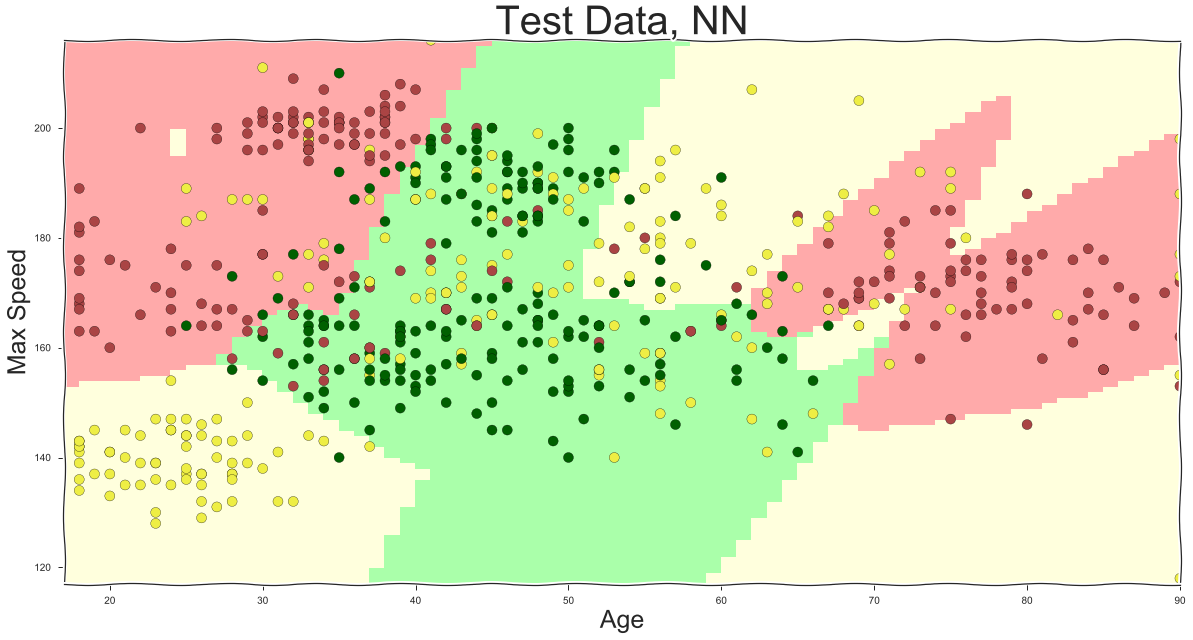

In [100]:
plot_keras_prediction(model, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, NN",
                fname='nn-test.png')

Even though scores do not look too bad, decision boundaries tell us, this is not a good result. We have several means of regularization for neural networks and we use a combination of them as described below.

In [101]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras
# regularisation:
# - dropout
# - batch normalization
# - reduce capacity of model

dropout = 0.6
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(100, name='hidden1', input_dim=2))
model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Activation('tanh'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(dropout))

model.add(tf.keras.layers.Dense(100, name='hidden2'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
# model.add(tf.keras.layers.Activation('tanh'))
model.add(tf.keras.layers.Dropout(dropout))

model.add(tf.keras.layers.Dense(num_categories, name='softmax', activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 100)               300       
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
hidden2 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
__________

In [102]:
BATCH_SIZE=1000
EPOCHS = 3000

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=500, verbose=1)

%time model.fit(X_train_2_dim, y_train_categorical, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=[early_stopping])
# %time model.fit(X_train_2_dim, y_train_categorical, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=[checkpoint, early_stopping])
# %time model.fit(X_train_2_dim, y_train_categorical, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Train on 720 samples, validate on 180 samples
Epoch 1/3000
720/720 [==============================] - 1s 816us/step - loss: 1.8508 - acc: 0.3292 - val_loss: 10.6559 - val_acc: 0.3389
Epoch 2/3000
720/720 [==============================] - 0s 32us/step - loss: 1.8174 - acc: 0.3125 - val_loss: 10.6559 - val_acc: 0.3389
Epoch 3/3000
720/720 [==============================] - 0s 17us/step - loss: 1.7843 - acc: 0.3153 - val_loss: 10.6559 - val_acc: 0.3389
Epoch 4/3000
720/720 [==============================] - 0s 15us/step - loss: 1.6498 - acc: 0.3639 - val_loss: 10.6559 - val_acc: 0.3389
Epoch 5/3000
720/720 [==============================] - 0s 15us/step - loss: 1.6546 - acc: 0.3278 - val_loss: 10.6559 - val_acc: 0.3389
Epoch 6/3000
720/720 [==============================] - 0s 15us/step - loss: 1.5620 - acc: 0.3375 - val_loss: 10.6497 - val_acc: 0.3389
Epoch 7/3000
720/720 [==============================] - 0s 15us/step - loss: 1.5826 - acc: 0.3611 - val_loss: 10.0252 - val_acc: 0.3389
E

Epoch 61/3000
720/720 [==============================] - 0s 14us/step - loss: 1.0118 - acc: 0.5500 - val_loss: 4.5275 - val_acc: 0.4000
Epoch 62/3000
720/720 [==============================] - 0s 15us/step - loss: 0.9286 - acc: 0.5722 - val_loss: 4.4502 - val_acc: 0.4000
Epoch 63/3000
720/720 [==============================] - 0s 14us/step - loss: 0.9867 - acc: 0.5500 - val_loss: 4.3776 - val_acc: 0.4056
Epoch 64/3000
720/720 [==============================] - 0s 14us/step - loss: 0.9756 - acc: 0.5500 - val_loss: 4.3104 - val_acc: 0.4056
Epoch 65/3000
720/720 [==============================] - 0s 14us/step - loss: 0.9419 - acc: 0.5778 - val_loss: 4.2406 - val_acc: 0.4056
Epoch 66/3000
720/720 [==============================] - 0s 17us/step - loss: 0.9549 - acc: 0.5792 - val_loss: 4.1855 - val_acc: 0.4056
Epoch 67/3000
720/720 [==============================] - 0s 15us/step - loss: 0.9732 - acc: 0.5472 - val_loss: 4.1162 - val_acc: 0.4056
Epoch 68/3000
720/720 [=========================

Epoch 122/3000
720/720 [==============================] - 0s 14us/step - loss: 0.8696 - acc: 0.6264 - val_loss: 1.9773 - val_acc: 0.4000
Epoch 123/3000
720/720 [==============================] - 0s 26us/step - loss: 0.8407 - acc: 0.6069 - val_loss: 1.9491 - val_acc: 0.4000
Epoch 124/3000
720/720 [==============================] - 0s 14us/step - loss: 0.8408 - acc: 0.6306 - val_loss: 1.9212 - val_acc: 0.4000
Epoch 125/3000
720/720 [==============================] - 0s 15us/step - loss: 0.8812 - acc: 0.6111 - val_loss: 1.8933 - val_acc: 0.4000
Epoch 126/3000
720/720 [==============================] - 0s 15us/step - loss: 0.8782 - acc: 0.5958 - val_loss: 1.8706 - val_acc: 0.4000
Epoch 127/3000
720/720 [==============================] - 0s 15us/step - loss: 0.8371 - acc: 0.6583 - val_loss: 1.8505 - val_acc: 0.4056
Epoch 128/3000
720/720 [==============================] - 0s 15us/step - loss: 0.8669 - acc: 0.6306 - val_loss: 1.8324 - val_acc: 0.4111
Epoch 129/3000
720/720 [=================

Epoch 182/3000
720/720 [==============================] - 0s 32us/step - loss: 0.8321 - acc: 0.6361 - val_loss: 1.1396 - val_acc: 0.5111
Epoch 183/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7946 - acc: 0.6667 - val_loss: 1.1364 - val_acc: 0.5167
Epoch 184/3000
720/720 [==============================] - 0s 15us/step - loss: 0.8410 - acc: 0.6306 - val_loss: 1.1321 - val_acc: 0.5222
Epoch 185/3000
720/720 [==============================] - 0s 15us/step - loss: 0.8219 - acc: 0.6458 - val_loss: 1.1270 - val_acc: 0.5111
Epoch 186/3000
720/720 [==============================] - 0s 15us/step - loss: 0.8267 - acc: 0.6486 - val_loss: 1.1208 - val_acc: 0.5278
Epoch 187/3000
720/720 [==============================] - 0s 26us/step - loss: 0.8400 - acc: 0.6444 - val_loss: 1.1153 - val_acc: 0.5278
Epoch 188/3000
720/720 [==============================] - 0s 17us/step - loss: 0.8122 - acc: 0.6431 - val_loss: 1.1098 - val_acc: 0.5278
Epoch 189/3000
720/720 [=================

Epoch 242/3000
720/720 [==============================] - 0s 17us/step - loss: 0.8029 - acc: 0.6417 - val_loss: 0.8512 - val_acc: 0.6222
Epoch 243/3000
720/720 [==============================] - 0s 28us/step - loss: 0.7781 - acc: 0.6472 - val_loss: 0.8467 - val_acc: 0.6222
Epoch 244/3000
720/720 [==============================] - 0s 18us/step - loss: 0.8208 - acc: 0.6500 - val_loss: 0.8431 - val_acc: 0.6222
Epoch 245/3000
720/720 [==============================] - 0s 15us/step - loss: 0.8005 - acc: 0.6542 - val_loss: 0.8384 - val_acc: 0.6167
Epoch 246/3000
720/720 [==============================] - 0s 15us/step - loss: 0.8162 - acc: 0.6319 - val_loss: 0.8349 - val_acc: 0.6167
Epoch 247/3000
720/720 [==============================] - 0s 15us/step - loss: 0.8088 - acc: 0.6556 - val_loss: 0.8310 - val_acc: 0.6167
Epoch 248/3000
720/720 [==============================] - 0s 15us/step - loss: 0.8124 - acc: 0.6514 - val_loss: 0.8275 - val_acc: 0.6167
Epoch 249/3000
720/720 [=================

Epoch 302/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7937 - acc: 0.6556 - val_loss: 0.7644 - val_acc: 0.6500
Epoch 303/3000
720/720 [==============================] - 0s 28us/step - loss: 0.7799 - acc: 0.6514 - val_loss: 0.7641 - val_acc: 0.6444
Epoch 304/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7951 - acc: 0.6583 - val_loss: 0.7647 - val_acc: 0.6444
Epoch 305/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7908 - acc: 0.6694 - val_loss: 0.7652 - val_acc: 0.6389
Epoch 306/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7634 - acc: 0.6625 - val_loss: 0.7663 - val_acc: 0.6389
Epoch 307/3000
720/720 [==============================] - 0s 18us/step - loss: 0.7907 - acc: 0.6694 - val_loss: 0.7667 - val_acc: 0.6444
Epoch 308/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7807 - acc: 0.6694 - val_loss: 0.7675 - val_acc: 0.6444
Epoch 309/3000
720/720 [=================

Epoch 362/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7748 - acc: 0.6708 - val_loss: 0.7298 - val_acc: 0.6778
Epoch 363/3000
720/720 [==============================] - 0s 29us/step - loss: 0.7979 - acc: 0.6500 - val_loss: 0.7298 - val_acc: 0.6778
Epoch 364/3000
720/720 [==============================] - 0s 29us/step - loss: 0.7803 - acc: 0.6625 - val_loss: 0.7296 - val_acc: 0.6778
Epoch 365/3000
720/720 [==============================] - 0s 19us/step - loss: 0.7853 - acc: 0.6681 - val_loss: 0.7295 - val_acc: 0.6778
Epoch 366/3000
720/720 [==============================] - 0s 33us/step - loss: 0.7700 - acc: 0.6694 - val_loss: 0.7292 - val_acc: 0.6778
Epoch 367/3000
720/720 [==============================] - 0s 50us/step - loss: 0.7843 - acc: 0.6625 - val_loss: 0.7289 - val_acc: 0.6778
Epoch 368/3000
720/720 [==============================] - 0s 29us/step - loss: 0.7577 - acc: 0.6750 - val_loss: 0.7288 - val_acc: 0.6778
Epoch 369/3000
720/720 [=================

Epoch 422/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7684 - acc: 0.6736 - val_loss: 0.7192 - val_acc: 0.6778
Epoch 423/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7859 - acc: 0.6694 - val_loss: 0.7188 - val_acc: 0.6778
Epoch 424/3000
720/720 [==============================] - 0s 29us/step - loss: 0.7876 - acc: 0.6625 - val_loss: 0.7185 - val_acc: 0.6833
Epoch 425/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7624 - acc: 0.6639 - val_loss: 0.7184 - val_acc: 0.6833
Epoch 426/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7700 - acc: 0.6694 - val_loss: 0.7181 - val_acc: 0.6833
Epoch 427/3000
720/720 [==============================] - 0s 14us/step - loss: 0.7674 - acc: 0.6736 - val_loss: 0.7178 - val_acc: 0.6778
Epoch 428/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7428 - acc: 0.6736 - val_loss: 0.7177 - val_acc: 0.6778
Epoch 429/3000
720/720 [=================

Epoch 482/3000
720/720 [==============================] - 0s 19us/step - loss: 0.7818 - acc: 0.6764 - val_loss: 0.7048 - val_acc: 0.6833
Epoch 483/3000
720/720 [==============================] - 0s 26us/step - loss: 0.7552 - acc: 0.6653 - val_loss: 0.7045 - val_acc: 0.6833
Epoch 484/3000
720/720 [==============================] - 0s 35us/step - loss: 0.7760 - acc: 0.6736 - val_loss: 0.7042 - val_acc: 0.6889
Epoch 485/3000
720/720 [==============================] - 0s 39us/step - loss: 0.7562 - acc: 0.6931 - val_loss: 0.7038 - val_acc: 0.6889
Epoch 486/3000
720/720 [==============================] - 0s 19us/step - loss: 0.7606 - acc: 0.6806 - val_loss: 0.7035 - val_acc: 0.6944
Epoch 487/3000
720/720 [==============================] - 0s 38us/step - loss: 0.7718 - acc: 0.6556 - val_loss: 0.7035 - val_acc: 0.6889
Epoch 488/3000
720/720 [==============================] - 0s 33us/step - loss: 0.7483 - acc: 0.6778 - val_loss: 0.7037 - val_acc: 0.6833
Epoch 489/3000
720/720 [=================

Epoch 542/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7433 - acc: 0.6611 - val_loss: 0.7022 - val_acc: 0.6778
Epoch 543/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7336 - acc: 0.6903 - val_loss: 0.7026 - val_acc: 0.6778
Epoch 544/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7531 - acc: 0.6917 - val_loss: 0.7031 - val_acc: 0.6778
Epoch 545/3000
720/720 [==============================] - 0s 14us/step - loss: 0.7599 - acc: 0.6542 - val_loss: 0.7033 - val_acc: 0.6778
Epoch 546/3000
720/720 [==============================] - 0s 14us/step - loss: 0.7382 - acc: 0.6861 - val_loss: 0.7036 - val_acc: 0.6833
Epoch 547/3000
720/720 [==============================] - 0s 14us/step - loss: 0.7583 - acc: 0.6819 - val_loss: 0.7039 - val_acc: 0.7000
Epoch 548/3000
720/720 [==============================] - 0s 14us/step - loss: 0.7449 - acc: 0.6861 - val_loss: 0.7041 - val_acc: 0.6889
Epoch 549/3000
720/720 [=================

Epoch 602/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7594 - acc: 0.6528 - val_loss: 0.6945 - val_acc: 0.6889
Epoch 603/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7218 - acc: 0.6903 - val_loss: 0.6945 - val_acc: 0.6944
Epoch 604/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7435 - acc: 0.6972 - val_loss: 0.6943 - val_acc: 0.6889
Epoch 605/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7550 - acc: 0.6681 - val_loss: 0.6945 - val_acc: 0.6833
Epoch 606/3000
720/720 [==============================] - 0s 31us/step - loss: 0.7527 - acc: 0.6764 - val_loss: 0.6946 - val_acc: 0.6833
Epoch 607/3000
720/720 [==============================] - 0s 18us/step - loss: 0.7548 - acc: 0.6792 - val_loss: 0.6947 - val_acc: 0.6833
Epoch 608/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7427 - acc: 0.6819 - val_loss: 0.6950 - val_acc: 0.6889
Epoch 609/3000
720/720 [=================

Epoch 662/3000
720/720 [==============================] - 0s 14us/step - loss: 0.7361 - acc: 0.6847 - val_loss: 0.7046 - val_acc: 0.6944
Epoch 663/3000
720/720 [==============================] - 0s 14us/step - loss: 0.7504 - acc: 0.6750 - val_loss: 0.7040 - val_acc: 0.6944
Epoch 664/3000
720/720 [==============================] - 0s 14us/step - loss: 0.7418 - acc: 0.6778 - val_loss: 0.7032 - val_acc: 0.6944
Epoch 665/3000
720/720 [==============================] - 0s 14us/step - loss: 0.7446 - acc: 0.6667 - val_loss: 0.7028 - val_acc: 0.6944
Epoch 666/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7427 - acc: 0.6903 - val_loss: 0.7021 - val_acc: 0.6944
Epoch 667/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7583 - acc: 0.6931 - val_loss: 0.7015 - val_acc: 0.6944
Epoch 668/3000
720/720 [==============================] - 0s 14us/step - loss: 0.7422 - acc: 0.6806 - val_loss: 0.7005 - val_acc: 0.6944
Epoch 669/3000
720/720 [=================

Epoch 722/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7273 - acc: 0.6764 - val_loss: 0.6954 - val_acc: 0.6833
Epoch 723/3000
720/720 [==============================] - 0s 14us/step - loss: 0.7282 - acc: 0.6931 - val_loss: 0.6953 - val_acc: 0.6833
Epoch 724/3000
720/720 [==============================] - 0s 18us/step - loss: 0.7345 - acc: 0.6917 - val_loss: 0.6953 - val_acc: 0.6833
Epoch 725/3000
720/720 [==============================] - 0s 26us/step - loss: 0.7466 - acc: 0.6792 - val_loss: 0.6950 - val_acc: 0.6778
Epoch 726/3000
720/720 [==============================] - 0s 18us/step - loss: 0.7312 - acc: 0.6917 - val_loss: 0.6946 - val_acc: 0.6778
Epoch 727/3000
720/720 [==============================] - 0s 18us/step - loss: 0.7457 - acc: 0.6792 - val_loss: 0.6944 - val_acc: 0.6778
Epoch 728/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7114 - acc: 0.6806 - val_loss: 0.6937 - val_acc: 0.6833
Epoch 729/3000
720/720 [=================

Epoch 782/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7393 - acc: 0.6847 - val_loss: 0.6846 - val_acc: 0.6889
Epoch 783/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7440 - acc: 0.6736 - val_loss: 0.6845 - val_acc: 0.6889
Epoch 784/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7196 - acc: 0.6778 - val_loss: 0.6840 - val_acc: 0.6944
Epoch 785/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7250 - acc: 0.6986 - val_loss: 0.6836 - val_acc: 0.6944
Epoch 786/3000
720/720 [==============================] - 0s 19us/step - loss: 0.7318 - acc: 0.6972 - val_loss: 0.6827 - val_acc: 0.6944
Epoch 787/3000
720/720 [==============================] - 0s 18us/step - loss: 0.7459 - acc: 0.6819 - val_loss: 0.6816 - val_acc: 0.6889
Epoch 788/3000
720/720 [==============================] - 0s 21us/step - loss: 0.7372 - acc: 0.6750 - val_loss: 0.6806 - val_acc: 0.6833
Epoch 789/3000
720/720 [=================

Epoch 842/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7381 - acc: 0.6750 - val_loss: 0.6866 - val_acc: 0.6889
Epoch 843/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7321 - acc: 0.6806 - val_loss: 0.6870 - val_acc: 0.6833
Epoch 844/3000
720/720 [==============================] - 0s 14us/step - loss: 0.7185 - acc: 0.6778 - val_loss: 0.6874 - val_acc: 0.6833
Epoch 845/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7287 - acc: 0.6847 - val_loss: 0.6875 - val_acc: 0.6833
Epoch 846/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7196 - acc: 0.6861 - val_loss: 0.6878 - val_acc: 0.6833
Epoch 847/3000
720/720 [==============================] - 0s 25us/step - loss: 0.7541 - acc: 0.6778 - val_loss: 0.6880 - val_acc: 0.6833
Epoch 848/3000
720/720 [==============================] - 0s 18us/step - loss: 0.7112 - acc: 0.6972 - val_loss: 0.6883 - val_acc: 0.6833
Epoch 849/3000
720/720 [=================

Epoch 902/3000
720/720 [==============================] - 0s 29us/step - loss: 0.7169 - acc: 0.6889 - val_loss: 0.6696 - val_acc: 0.7167
Epoch 903/3000
720/720 [==============================] - 0s 18us/step - loss: 0.7223 - acc: 0.6819 - val_loss: 0.6692 - val_acc: 0.7167
Epoch 904/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7160 - acc: 0.6986 - val_loss: 0.6693 - val_acc: 0.7167
Epoch 905/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7385 - acc: 0.6861 - val_loss: 0.6694 - val_acc: 0.7056
Epoch 906/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7232 - acc: 0.6986 - val_loss: 0.6697 - val_acc: 0.7056
Epoch 907/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7388 - acc: 0.6875 - val_loss: 0.6697 - val_acc: 0.7056
Epoch 908/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7375 - acc: 0.6847 - val_loss: 0.6697 - val_acc: 0.7056
Epoch 909/3000
720/720 [=================

Epoch 962/3000
720/720 [==============================] - 0s 18us/step - loss: 0.7242 - acc: 0.6819 - val_loss: 0.6776 - val_acc: 0.7000
Epoch 963/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7335 - acc: 0.6986 - val_loss: 0.6767 - val_acc: 0.7056
Epoch 964/3000
720/720 [==============================] - 0s 26us/step - loss: 0.7567 - acc: 0.6889 - val_loss: 0.6757 - val_acc: 0.7056
Epoch 965/3000
720/720 [==============================] - 0s 18us/step - loss: 0.6939 - acc: 0.7069 - val_loss: 0.6753 - val_acc: 0.7056
Epoch 966/3000
720/720 [==============================] - 0s 18us/step - loss: 0.7303 - acc: 0.6819 - val_loss: 0.6750 - val_acc: 0.7056
Epoch 967/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7023 - acc: 0.7042 - val_loss: 0.6749 - val_acc: 0.7056
Epoch 968/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6951 - acc: 0.7000 - val_loss: 0.6749 - val_acc: 0.7111
Epoch 969/3000
720/720 [=================

Epoch 1022/3000
720/720 [==============================] - 0s 32us/step - loss: 0.7091 - acc: 0.7014 - val_loss: 0.6729 - val_acc: 0.7000
Epoch 1023/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7162 - acc: 0.6944 - val_loss: 0.6732 - val_acc: 0.6944
Epoch 1024/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7107 - acc: 0.7097 - val_loss: 0.6733 - val_acc: 0.6944
Epoch 1025/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7105 - acc: 0.7028 - val_loss: 0.6739 - val_acc: 0.6944
Epoch 1026/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7442 - acc: 0.6889 - val_loss: 0.6748 - val_acc: 0.6944
Epoch 1027/3000
720/720 [==============================] - 0s 29us/step - loss: 0.7513 - acc: 0.6875 - val_loss: 0.6757 - val_acc: 0.7000
Epoch 1028/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7361 - acc: 0.6889 - val_loss: 0.6763 - val_acc: 0.7000
Epoch 1029/3000
720/720 [=========

Epoch 1082/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7065 - acc: 0.6986 - val_loss: 0.6815 - val_acc: 0.6889
Epoch 1083/3000
720/720 [==============================] - 0s 25us/step - loss: 0.6996 - acc: 0.6931 - val_loss: 0.6823 - val_acc: 0.6833
Epoch 1084/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7232 - acc: 0.6847 - val_loss: 0.6828 - val_acc: 0.6833
Epoch 1085/3000
720/720 [==============================] - 0s 18us/step - loss: 0.7113 - acc: 0.6944 - val_loss: 0.6833 - val_acc: 0.6833
Epoch 1086/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7163 - acc: 0.6778 - val_loss: 0.6836 - val_acc: 0.6833
Epoch 1087/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7175 - acc: 0.6972 - val_loss: 0.6838 - val_acc: 0.6889
Epoch 1088/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7275 - acc: 0.6958 - val_loss: 0.6843 - val_acc: 0.6889
Epoch 1089/3000
720/720 [=========

Epoch 1142/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6985 - acc: 0.6889 - val_loss: 0.6635 - val_acc: 0.7278
Epoch 1143/3000
720/720 [==============================] - 0s 18us/step - loss: 0.7103 - acc: 0.6972 - val_loss: 0.6627 - val_acc: 0.7278
Epoch 1144/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7086 - acc: 0.7000 - val_loss: 0.6625 - val_acc: 0.7278
Epoch 1145/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7161 - acc: 0.6944 - val_loss: 0.6625 - val_acc: 0.7278
Epoch 1146/3000
720/720 [==============================] - 0s 18us/step - loss: 0.6999 - acc: 0.7014 - val_loss: 0.6626 - val_acc: 0.7278
Epoch 1147/3000
720/720 [==============================] - 0s 31us/step - loss: 0.7036 - acc: 0.7014 - val_loss: 0.6630 - val_acc: 0.7222
Epoch 1148/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7113 - acc: 0.6847 - val_loss: 0.6635 - val_acc: 0.7111
Epoch 1149/3000
720/720 [=========

Epoch 1202/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7064 - acc: 0.6972 - val_loss: 0.6570 - val_acc: 0.7056
Epoch 1203/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7119 - acc: 0.7014 - val_loss: 0.6577 - val_acc: 0.7056
Epoch 1204/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7051 - acc: 0.6972 - val_loss: 0.6593 - val_acc: 0.7000
Epoch 1205/3000
720/720 [==============================] - 0s 28us/step - loss: 0.7291 - acc: 0.6944 - val_loss: 0.6604 - val_acc: 0.6944
Epoch 1206/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7094 - acc: 0.6847 - val_loss: 0.6615 - val_acc: 0.7000
Epoch 1207/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7052 - acc: 0.7014 - val_loss: 0.6625 - val_acc: 0.7000
Epoch 1208/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7097 - acc: 0.6944 - val_loss: 0.6636 - val_acc: 0.6944
Epoch 1209/3000
720/720 [=========

Epoch 1262/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6938 - acc: 0.6931 - val_loss: 0.6644 - val_acc: 0.6889
Epoch 1263/3000
720/720 [==============================] - 0s 18us/step - loss: 0.7015 - acc: 0.7000 - val_loss: 0.6641 - val_acc: 0.6944
Epoch 1264/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6996 - acc: 0.7069 - val_loss: 0.6641 - val_acc: 0.6944
Epoch 1265/3000
720/720 [==============================] - 0s 31us/step - loss: 0.7067 - acc: 0.7042 - val_loss: 0.6641 - val_acc: 0.6944
Epoch 1266/3000
720/720 [==============================] - 0s 18us/step - loss: 0.6956 - acc: 0.7000 - val_loss: 0.6643 - val_acc: 0.6944
Epoch 1267/3000
720/720 [==============================] - 0s 18us/step - loss: 0.6778 - acc: 0.7042 - val_loss: 0.6646 - val_acc: 0.7000
Epoch 1268/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6919 - acc: 0.7000 - val_loss: 0.6651 - val_acc: 0.7000
Epoch 1269/3000
720/720 [=========

Epoch 1322/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7171 - acc: 0.6944 - val_loss: 0.6543 - val_acc: 0.7111
Epoch 1323/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6805 - acc: 0.7111 - val_loss: 0.6538 - val_acc: 0.7111
Epoch 1324/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6962 - acc: 0.6972 - val_loss: 0.6534 - val_acc: 0.7111
Epoch 1325/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7195 - acc: 0.6861 - val_loss: 0.6530 - val_acc: 0.7111
Epoch 1326/3000
720/720 [==============================] - 0s 19us/step - loss: 0.6712 - acc: 0.7139 - val_loss: 0.6525 - val_acc: 0.7111
Epoch 1327/3000
720/720 [==============================] - 0s 18us/step - loss: 0.7231 - acc: 0.7097 - val_loss: 0.6517 - val_acc: 0.7111
Epoch 1328/3000
720/720 [==============================] - 0s 31us/step - loss: 0.6912 - acc: 0.7056 - val_loss: 0.6507 - val_acc: 0.7056
Epoch 1329/3000
720/720 [=========

Epoch 1382/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6961 - acc: 0.7125 - val_loss: 0.6681 - val_acc: 0.6889
Epoch 1383/3000
720/720 [==============================] - 0s 29us/step - loss: 0.6731 - acc: 0.7014 - val_loss: 0.6686 - val_acc: 0.6889
Epoch 1384/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6698 - acc: 0.7097 - val_loss: 0.6687 - val_acc: 0.6889
Epoch 1385/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6964 - acc: 0.6958 - val_loss: 0.6690 - val_acc: 0.6889
Epoch 1386/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6878 - acc: 0.7083 - val_loss: 0.6693 - val_acc: 0.6889
Epoch 1387/3000
720/720 [==============================] - 0s 18us/step - loss: 0.7062 - acc: 0.6917 - val_loss: 0.6696 - val_acc: 0.6889
Epoch 1388/3000
720/720 [==============================] - 0s 18us/step - loss: 0.6941 - acc: 0.7139 - val_loss: 0.6702 - val_acc: 0.6889
Epoch 1389/3000
720/720 [=========

Epoch 1442/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6742 - acc: 0.6972 - val_loss: 0.6603 - val_acc: 0.7000
Epoch 1443/3000
720/720 [==============================] - 0s 26us/step - loss: 0.6851 - acc: 0.7097 - val_loss: 0.6600 - val_acc: 0.7111
Epoch 1444/3000
720/720 [==============================] - 0s 18us/step - loss: 0.7106 - acc: 0.7000 - val_loss: 0.6592 - val_acc: 0.7111
Epoch 1445/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7146 - acc: 0.6861 - val_loss: 0.6586 - val_acc: 0.7111
Epoch 1446/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7051 - acc: 0.6972 - val_loss: 0.6578 - val_acc: 0.7111
Epoch 1447/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6944 - acc: 0.6986 - val_loss: 0.6571 - val_acc: 0.7056
Epoch 1448/3000
720/720 [==============================] - 0s 18us/step - loss: 0.6823 - acc: 0.6986 - val_loss: 0.6567 - val_acc: 0.7056
Epoch 1449/3000
720/720 [=========

Epoch 1502/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6809 - acc: 0.7125 - val_loss: 0.6537 - val_acc: 0.7000
Epoch 1503/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7249 - acc: 0.6972 - val_loss: 0.6528 - val_acc: 0.7000
Epoch 1504/3000
720/720 [==============================] - 0s 18us/step - loss: 0.6791 - acc: 0.7042 - val_loss: 0.6517 - val_acc: 0.7000
Epoch 1505/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6908 - acc: 0.7069 - val_loss: 0.6510 - val_acc: 0.7111
Epoch 1506/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7087 - acc: 0.7111 - val_loss: 0.6503 - val_acc: 0.7167
Epoch 1507/3000
720/720 [==============================] - 0s 18us/step - loss: 0.7036 - acc: 0.6903 - val_loss: 0.6498 - val_acc: 0.7167
Epoch 1508/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6871 - acc: 0.6958 - val_loss: 0.6495 - val_acc: 0.7167
Epoch 1509/3000
720/720 [=========

Epoch 1562/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6744 - acc: 0.7153 - val_loss: 0.6521 - val_acc: 0.7000
Epoch 1563/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7040 - acc: 0.7014 - val_loss: 0.6517 - val_acc: 0.7000
Epoch 1564/3000
720/720 [==============================] - 0s 14us/step - loss: 0.6923 - acc: 0.7056 - val_loss: 0.6514 - val_acc: 0.7000
Epoch 1565/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6825 - acc: 0.7069 - val_loss: 0.6510 - val_acc: 0.7000
Epoch 1566/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6950 - acc: 0.7111 - val_loss: 0.6512 - val_acc: 0.7000
Epoch 1567/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6938 - acc: 0.7139 - val_loss: 0.6519 - val_acc: 0.7000
Epoch 1568/3000
720/720 [==============================] - 0s 29us/step - loss: 0.7082 - acc: 0.6944 - val_loss: 0.6524 - val_acc: 0.7000
Epoch 1569/3000
720/720 [=========

Epoch 1622/3000
720/720 [==============================] - 0s 39us/step - loss: 0.6608 - acc: 0.7403 - val_loss: 0.6580 - val_acc: 0.7167
Epoch 1623/3000
720/720 [==============================] - 0s 33us/step - loss: 0.6727 - acc: 0.6958 - val_loss: 0.6580 - val_acc: 0.7167
Epoch 1624/3000
720/720 [==============================] - 0s 33us/step - loss: 0.6916 - acc: 0.7014 - val_loss: 0.6581 - val_acc: 0.7111
Epoch 1625/3000
720/720 [==============================] - 0s 31us/step - loss: 0.6840 - acc: 0.7153 - val_loss: 0.6580 - val_acc: 0.7111
Epoch 1626/3000
720/720 [==============================] - 0s 43us/step - loss: 0.6789 - acc: 0.7125 - val_loss: 0.6582 - val_acc: 0.7111
Epoch 1627/3000
720/720 [==============================] - 0s 46us/step - loss: 0.6740 - acc: 0.7153 - val_loss: 0.6573 - val_acc: 0.7111
Epoch 1628/3000
720/720 [==============================] - 0s 32us/step - loss: 0.6681 - acc: 0.7194 - val_loss: 0.6565 - val_acc: 0.7222
Epoch 1629/3000
720/720 [=========

Epoch 1682/3000
720/720 [==============================] - 0s 33us/step - loss: 0.6730 - acc: 0.7153 - val_loss: 0.6555 - val_acc: 0.7111
Epoch 1683/3000
720/720 [==============================] - 0s 28us/step - loss: 0.6939 - acc: 0.7014 - val_loss: 0.6537 - val_acc: 0.7056
Epoch 1684/3000
720/720 [==============================] - 0s 26us/step - loss: 0.6617 - acc: 0.7014 - val_loss: 0.6522 - val_acc: 0.7056
Epoch 1685/3000
720/720 [==============================] - 0s 28us/step - loss: 0.6836 - acc: 0.7139 - val_loss: 0.6511 - val_acc: 0.7167
Epoch 1686/3000
720/720 [==============================] - 0s 19us/step - loss: 0.6857 - acc: 0.7083 - val_loss: 0.6502 - val_acc: 0.7167
Epoch 1687/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6957 - acc: 0.6944 - val_loss: 0.6494 - val_acc: 0.7167
Epoch 1688/3000
720/720 [==============================] - 0s 32us/step - loss: 0.6767 - acc: 0.7111 - val_loss: 0.6483 - val_acc: 0.7333
Epoch 1689/3000
720/720 [=========

Epoch 1742/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6529 - acc: 0.7153 - val_loss: 0.6579 - val_acc: 0.7111
Epoch 1743/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6602 - acc: 0.7208 - val_loss: 0.6569 - val_acc: 0.7111
Epoch 1744/3000
720/720 [==============================] - 0s 21us/step - loss: 0.6999 - acc: 0.6861 - val_loss: 0.6554 - val_acc: 0.7111
Epoch 1745/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7078 - acc: 0.6972 - val_loss: 0.6544 - val_acc: 0.7111
Epoch 1746/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6700 - acc: 0.7181 - val_loss: 0.6532 - val_acc: 0.7111
Epoch 1747/3000
720/720 [==============================] - 0s 14us/step - loss: 0.6639 - acc: 0.7167 - val_loss: 0.6525 - val_acc: 0.7111
Epoch 1748/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6738 - acc: 0.7125 - val_loss: 0.6511 - val_acc: 0.7167
Epoch 1749/3000
720/720 [=========

Epoch 1802/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6953 - acc: 0.7069 - val_loss: 0.6457 - val_acc: 0.7222
Epoch 1803/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6819 - acc: 0.7014 - val_loss: 0.6466 - val_acc: 0.7278
Epoch 1804/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6988 - acc: 0.6903 - val_loss: 0.6471 - val_acc: 0.7222
Epoch 1805/3000
720/720 [==============================] - 0s 14us/step - loss: 0.6777 - acc: 0.7083 - val_loss: 0.6482 - val_acc: 0.7111
Epoch 1806/3000
720/720 [==============================] - 0s 14us/step - loss: 0.6764 - acc: 0.7042 - val_loss: 0.6495 - val_acc: 0.7167
Epoch 1807/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6822 - acc: 0.7153 - val_loss: 0.6513 - val_acc: 0.7167
Epoch 1808/3000
720/720 [==============================] - 0s 17us/step - loss: 0.7004 - acc: 0.7167 - val_loss: 0.6528 - val_acc: 0.7111
Epoch 1809/3000
720/720 [=========

Epoch 1862/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6964 - acc: 0.7042 - val_loss: 0.6427 - val_acc: 0.7111
Epoch 1863/3000
720/720 [==============================] - 0s 14us/step - loss: 0.6682 - acc: 0.7069 - val_loss: 0.6427 - val_acc: 0.7111
Epoch 1864/3000
720/720 [==============================] - 0s 14us/step - loss: 0.6798 - acc: 0.7125 - val_loss: 0.6434 - val_acc: 0.7056
Epoch 1865/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6689 - acc: 0.6958 - val_loss: 0.6444 - val_acc: 0.7056
Epoch 1866/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6589 - acc: 0.7056 - val_loss: 0.6456 - val_acc: 0.7056
Epoch 1867/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6939 - acc: 0.7069 - val_loss: 0.6464 - val_acc: 0.7056
Epoch 1868/3000
720/720 [==============================] - 0s 19us/step - loss: 0.6783 - acc: 0.7111 - val_loss: 0.6466 - val_acc: 0.7167
Epoch 1869/3000
720/720 [=========

Epoch 1922/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6499 - acc: 0.7167 - val_loss: 0.6454 - val_acc: 0.6944
Epoch 1923/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6823 - acc: 0.7000 - val_loss: 0.6439 - val_acc: 0.7000
Epoch 1924/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6936 - acc: 0.7056 - val_loss: 0.6429 - val_acc: 0.7056
Epoch 1925/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6995 - acc: 0.6986 - val_loss: 0.6420 - val_acc: 0.7056
Epoch 1926/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6752 - acc: 0.7208 - val_loss: 0.6413 - val_acc: 0.7111
Epoch 1927/3000
720/720 [==============================] - 0s 24us/step - loss: 0.6832 - acc: 0.7028 - val_loss: 0.6409 - val_acc: 0.7167
Epoch 1928/3000
720/720 [==============================] - 0s 21us/step - loss: 0.6784 - acc: 0.7222 - val_loss: 0.6409 - val_acc: 0.7167
Epoch 1929/3000
720/720 [=========

Epoch 1982/3000
720/720 [==============================] - 0s 15us/step - loss: 0.7024 - acc: 0.6889 - val_loss: 0.6592 - val_acc: 0.6778
Epoch 1983/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6585 - acc: 0.7111 - val_loss: 0.6617 - val_acc: 0.6778
Epoch 1984/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6716 - acc: 0.7056 - val_loss: 0.6634 - val_acc: 0.6778
Epoch 1985/3000
720/720 [==============================] - 0s 14us/step - loss: 0.6821 - acc: 0.7125 - val_loss: 0.6650 - val_acc: 0.6778
Epoch 1986/3000
720/720 [==============================] - 0s 14us/step - loss: 0.7002 - acc: 0.7042 - val_loss: 0.6652 - val_acc: 0.6778
Epoch 1987/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6744 - acc: 0.7222 - val_loss: 0.6652 - val_acc: 0.6778
Epoch 1988/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6962 - acc: 0.7000 - val_loss: 0.6647 - val_acc: 0.6778
Epoch 1989/3000
720/720 [=========

Epoch 2042/3000
720/720 [==============================] - 0s 29us/step - loss: 0.6602 - acc: 0.7153 - val_loss: 0.6578 - val_acc: 0.7056
Epoch 2043/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6791 - acc: 0.6986 - val_loss: 0.6591 - val_acc: 0.7111
Epoch 2044/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6769 - acc: 0.6986 - val_loss: 0.6587 - val_acc: 0.7111
Epoch 2045/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6850 - acc: 0.7042 - val_loss: 0.6588 - val_acc: 0.7111
Epoch 2046/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6649 - acc: 0.7056 - val_loss: 0.6595 - val_acc: 0.7056
Epoch 2047/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6664 - acc: 0.7042 - val_loss: 0.6607 - val_acc: 0.7056
Epoch 2048/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6650 - acc: 0.7264 - val_loss: 0.6621 - val_acc: 0.7056
Epoch 2049/3000
720/720 [=========

Epoch 2102/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6823 - acc: 0.7000 - val_loss: 0.6475 - val_acc: 0.7278
Epoch 2103/3000
720/720 [==============================] - 0s 18us/step - loss: 0.6694 - acc: 0.7042 - val_loss: 0.6483 - val_acc: 0.7278
Epoch 2104/3000
720/720 [==============================] - 0s 22us/step - loss: 0.6842 - acc: 0.6972 - val_loss: 0.6490 - val_acc: 0.7278
Epoch 2105/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6764 - acc: 0.7125 - val_loss: 0.6496 - val_acc: 0.7278
Epoch 2106/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6837 - acc: 0.7167 - val_loss: 0.6506 - val_acc: 0.7278
Epoch 2107/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6759 - acc: 0.7042 - val_loss: 0.6515 - val_acc: 0.7278
Epoch 2108/3000
720/720 [==============================] - 0s 14us/step - loss: 0.6914 - acc: 0.7069 - val_loss: 0.6523 - val_acc: 0.7222
Epoch 2109/3000
720/720 [=========

Epoch 2162/3000
720/720 [==============================] - 0s 18us/step - loss: 0.6530 - acc: 0.7208 - val_loss: 0.6724 - val_acc: 0.6889
Epoch 2163/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6616 - acc: 0.7111 - val_loss: 0.6704 - val_acc: 0.6889
Epoch 2164/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6831 - acc: 0.7181 - val_loss: 0.6685 - val_acc: 0.6889
Epoch 2165/3000
720/720 [==============================] - 0s 14us/step - loss: 0.6607 - acc: 0.7111 - val_loss: 0.6666 - val_acc: 0.6889
Epoch 2166/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6642 - acc: 0.7000 - val_loss: 0.6650 - val_acc: 0.6944
Epoch 2167/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6528 - acc: 0.7111 - val_loss: 0.6641 - val_acc: 0.7000
Epoch 2168/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6661 - acc: 0.7236 - val_loss: 0.6635 - val_acc: 0.7000
Epoch 2169/3000
720/720 [=========

Epoch 2222/3000
720/720 [==============================] - 0s 18us/step - loss: 0.6748 - acc: 0.7181 - val_loss: 0.6818 - val_acc: 0.7111
Epoch 2223/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6752 - acc: 0.7083 - val_loss: 0.6853 - val_acc: 0.7111
Epoch 2224/3000
720/720 [==============================] - 0s 31us/step - loss: 0.6608 - acc: 0.7194 - val_loss: 0.6875 - val_acc: 0.7111
Epoch 2225/3000
720/720 [==============================] - 0s 18us/step - loss: 0.6608 - acc: 0.7167 - val_loss: 0.6881 - val_acc: 0.7056
Epoch 2226/3000
720/720 [==============================] - 0s 18us/step - loss: 0.6709 - acc: 0.7208 - val_loss: 0.6876 - val_acc: 0.7056
Epoch 2227/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6697 - acc: 0.7333 - val_loss: 0.6863 - val_acc: 0.7000
Epoch 2228/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6891 - acc: 0.7167 - val_loss: 0.6849 - val_acc: 0.7000
Epoch 2229/3000
720/720 [=========

Epoch 2282/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6794 - acc: 0.7153 - val_loss: 0.6646 - val_acc: 0.7056
Epoch 2283/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6815 - acc: 0.6931 - val_loss: 0.6664 - val_acc: 0.7056
Epoch 2284/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6745 - acc: 0.7056 - val_loss: 0.6689 - val_acc: 0.6944
Epoch 2285/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6920 - acc: 0.7056 - val_loss: 0.6701 - val_acc: 0.7000
Epoch 2286/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6758 - acc: 0.7167 - val_loss: 0.6702 - val_acc: 0.7000
Epoch 2287/3000
720/720 [==============================] - 0s 28us/step - loss: 0.6656 - acc: 0.7208 - val_loss: 0.6696 - val_acc: 0.7000
Epoch 2288/3000
720/720 [==============================] - 0s 19us/step - loss: 0.6612 - acc: 0.7208 - val_loss: 0.6688 - val_acc: 0.7000
Epoch 2289/3000
720/720 [=========

Epoch 2342/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6689 - acc: 0.7264 - val_loss: 0.6551 - val_acc: 0.7167
Epoch 2343/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6550 - acc: 0.7292 - val_loss: 0.6546 - val_acc: 0.7278
Epoch 2344/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6643 - acc: 0.7167 - val_loss: 0.6544 - val_acc: 0.7278
Epoch 2345/3000
720/720 [==============================] - 0s 18us/step - loss: 0.6670 - acc: 0.7222 - val_loss: 0.6537 - val_acc: 0.7222
Epoch 2346/3000
720/720 [==============================] - 0s 25us/step - loss: 0.6654 - acc: 0.7083 - val_loss: 0.6524 - val_acc: 0.7333
Epoch 2347/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6628 - acc: 0.7153 - val_loss: 0.6516 - val_acc: 0.7333
Epoch 2348/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6653 - acc: 0.7069 - val_loss: 0.6503 - val_acc: 0.7278
Epoch 2349/3000
720/720 [=========

Epoch 2402/3000
720/720 [==============================] - 0s 18us/step - loss: 0.6615 - acc: 0.7153 - val_loss: 0.6710 - val_acc: 0.7000
Epoch 2403/3000
720/720 [==============================] - 0s 25us/step - loss: 0.6558 - acc: 0.7139 - val_loss: 0.6702 - val_acc: 0.7056
Epoch 2404/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6501 - acc: 0.7264 - val_loss: 0.6689 - val_acc: 0.7056
Epoch 2405/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6693 - acc: 0.7194 - val_loss: 0.6661 - val_acc: 0.7056
Epoch 2406/3000
720/720 [==============================] - 0s 15us/step - loss: 0.6790 - acc: 0.7167 - val_loss: 0.6647 - val_acc: 0.7111
Epoch 2407/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6653 - acc: 0.7167 - val_loss: 0.6640 - val_acc: 0.7111
Epoch 2408/3000
720/720 [==============================] - 0s 17us/step - loss: 0.6753 - acc: 0.7208 - val_loss: 0.6626 - val_acc: 0.7111
Epoch 2409/3000
720/720 [=========

In [103]:
# use the best model
# from keras.models import load_model

# model = load_model('keras-model.hdf5')

In [104]:
train_loss, train_accuracy = model.evaluate(X_train_2_dim, y_train_categorical, batch_size=BATCH_SIZE)
train_accuracy

900/900 [==============================] - 0s 3us/step


0.7155555486679077

In [105]:
test_loss, test_accuracy = model.evaluate(X_test_2_dim, y_test_categorical, batch_size=BATCH_SIZE)
test_accuracy

600/600 [==============================] - 0s 5us/step


0.7049999833106995

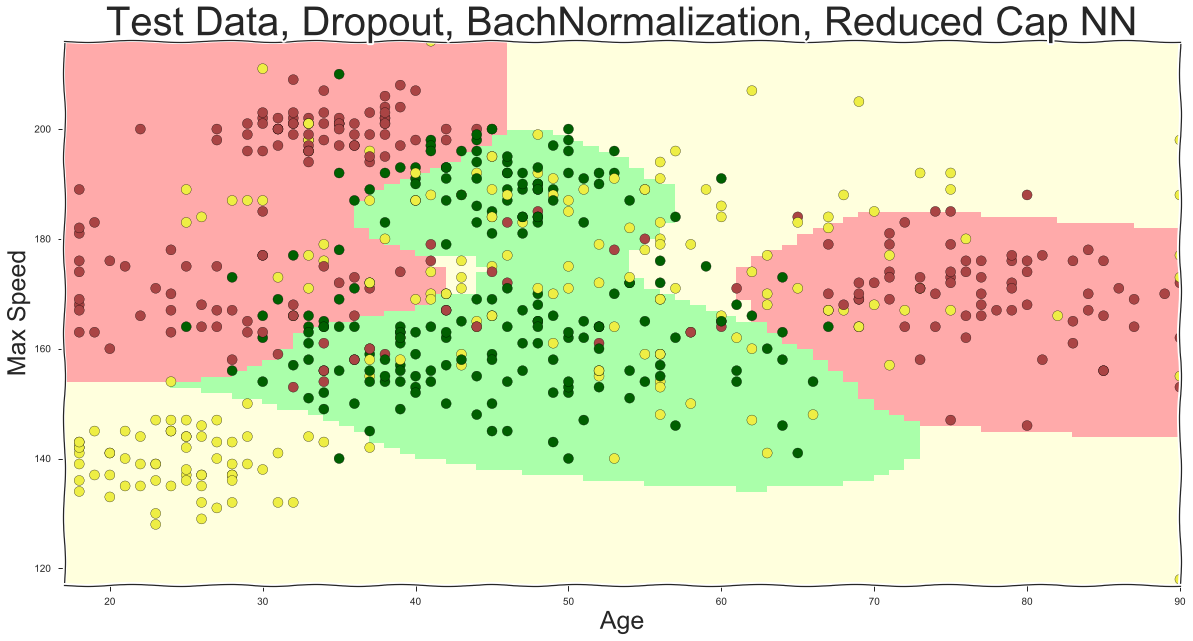

In [106]:
plot_keras_prediction(model, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Dropout, BachNormalization, Reduced Cap NN",
                fname='nn-reg-test.png')

### It is surprising how smooth and very similar these decision boundaries are to the ones created by SVM